# Tareas a realizar
---
1. Introduccion
   - Contexto
   - Objectivo: Que queremos predecir y porques
    
2. Cargar el *dataset tips* <https://raw.githubusercontent.com/mwaskom/seaborn-data/refs/heads/master/tips.csv> con Pandas
    
3. Realizar una **exploracion estadistica descriptiva** de los datos con Panda
   - Descripcion de las variables.
   - Correlacion 
   - Valores unicos ( Unique) , mas frecuentes ( top ) , frecuencia de valor mas comun (freq).
   - Inspeccion de balanceo varibales categoricas.
  
4. EDAS (Exploratory Data Analisys)   
   - Detectar valores nulos.
   - Corregir valores nulos.
   - Corregir tipos de datos.
   - Eliminar duplicados.
   - Identificar Outliers y tratarlos.
  
5. Visualizacion 
   - Univariante
   - Bivariante
   - Multivariante
  
6. Modelado
   - Probar *varios* modelos de Scikit Learn , para predecir la columna tip del dataset
   - Escalar las columnas numericas
   - Particionar los datos con *train_test_split*
   - Ver el mejor modelo

## 1. Indroduccion

Disponemos de un Data Set con los registro de los gastos de comidas de un restaurante y otras caracteristicas considerada utiles.

El objetivo es predecir la PROPINA  que dejan los clientes en un restaurante.


## 2. Cargar el dataset
- Importamos Pandas
- Copiamos los datos en formato csv y lo colocamos en un nuevo archivo en el directorio (tips.csv) 
- Leemos una primera muestra de 20 filas aleatoria, para visualizar el dataframe, sobretodo ver el Header.  

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('tips.csv')
print(df.sample(n=20))

     total_bill   tip     sex smoker   day    time  size
86        13.03  2.00    Male     No  Thur   Lunch     2
25        17.81  2.34    Male     No   Sat  Dinner     4
124       12.48  2.52  Female     No  Thur   Lunch     2
88        24.71  5.85    Male     No  Thur   Lunch     2
42        13.94  3.06    Male     No   Sun  Dinner     2
147       11.87  1.63  Female     No  Thur   Lunch     2
100       11.35  2.50  Female    Yes   Fri  Dinner     2
144       16.43  2.30  Female     No  Thur   Lunch     2
180       34.65  3.68    Male    Yes   Sun  Dinner     4
158       13.39  2.61  Female     No   Sun  Dinner     2
232       11.61  3.39    Male     No   Sat  Dinner     2
188       18.15  3.50  Female    Yes   Sun  Dinner     3
176       17.89  2.00    Male    Yes   Sun  Dinner     2
207       38.73  3.00    Male    Yes   Sat  Dinner     4
109       14.31  4.00  Female    Yes   Sat  Dinner     2
108       18.24  3.76    Male     No   Sat  Dinner     2
58        11.24  1.76    Male  

### Renombramos columnas

- leemos la cabecera, para tener presente los nombre y poder renombrar mas facilmente.

In [2]:
df.columns= ['Total Tiket', 'Propina','Genero','Fumador','Dia','Evento','Comensales']
print(df.head())

   Total Tiket  Propina  Genero Fumador  Dia  Evento  Comensales
0        16.99     1.01  Female      No  Sun  Dinner           2
1        10.34     1.66    Male      No  Sun  Dinner           3
2        21.01     3.50    Male      No  Sun  Dinner           3
3        23.68     3.31    Male      No  Sun  Dinner           2
4        24.59     3.61  Female      No  Sun  Dinner           4


### Renombrar variables
- Renombramos los valores de las variables categoricas, para una mejor lectura.

In [3]:
df = df.replace({
    "Genero": {
        "Female": "Mujer",
        "Male": "Hombre"
    },
    "Dia":{
        "Thur": "Miercoles",
        "Fri": "Viernes",       
        "Sat": "Sabado",
        "Sun": "Domingo",
    },
    "Fumador": {
        "Yes": "Sí",
        "No": "No"
    },
    "Evento": {
        "Dinner": "Cena",
        "Lunch": "Almuerzo"
    }
})
print(df)

     Total Tiket  Propina  Genero Fumador        Dia Evento  Comensales
0          16.99     1.01   Mujer      No    Domingo   Cena           2
1          10.34     1.66  Hombre      No    Domingo   Cena           3
2          21.01     3.50  Hombre      No    Domingo   Cena           3
3          23.68     3.31  Hombre      No    Domingo   Cena           2
4          24.59     3.61   Mujer      No    Domingo   Cena           4
..           ...      ...     ...     ...        ...    ...         ...
239        29.03     5.92  Hombre      No     Sabado   Cena           3
240        27.18     2.00   Mujer      Sí     Sabado   Cena           2
241        22.67     2.00  Hombre      Sí     Sabado   Cena           2
242        17.82     1.75  Hombre      No     Sabado   Cena           2
243        18.78     3.00   Mujer      No  Miercoles   Cena           2

[244 rows x 7 columns]


### Tipos de datos
- Averiguar tipos de datos, tamaño, etc

In [4]:
print(
    f"Numero de filas y columnas:{df.shape}\n"
    f"Numero total de elementos : {df.size}\n "
    )
print(df.dtypes.to_frame(name="Tipos de datos"))

Numero de filas y columnas:(244, 7)
Numero total de elementos : 1708
 
            Tipos de datos
Total Tiket        float64
Propina            float64
Genero                 str
Fumador                str
Dia                    str
Evento                 str
Comensales           int64


### Definir Variable Cualitativa y Cuantitativa
- Generamos una nueva tabla para identificar el tipo de variable ( Cualitativa o cuantitativa), a nivel teorico como   complemento a la informacion que ya tenemos.

In [5]:
tabla_tipos = pd.DataFrame({
    "Nombre": df.columns,
    "Tipo": [
        "Cuantitativa / Continua",
        "Cuantitativa / Continua",
        "Cualitativa / Nominal",
        "Cualitativa / Nominal",
        "Cualitativa / Nominal",
        "Cualitativa / Nominal",
        "Cuantitativa / Discreta"
    ]
})
print(tabla_tipos.to_string(index=False))

     Nombre                    Tipo
Total Tiket Cuantitativa / Continua
    Propina Cuantitativa / Continua
     Genero   Cualitativa / Nominal
    Fumador   Cualitativa / Nominal
        Dia   Cualitativa / Nominal
     Evento   Cualitativa / Nominal
 Comensales Cuantitativa / Discreta


### Nulos 
- Inspeccion  *estructura* completa de nuestra data y detectar valore nulos.

In [6]:
print(df.info())

<class 'pandas.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Total Tiket  244 non-null    float64
 1   Propina      244 non-null    float64
 2   Genero       244 non-null    str    
 3   Fumador      244 non-null    str    
 4   Dia          244 non-null    str    
 5   Evento       244 non-null    str    
 6   Comensales   244 non-null    int64  
dtypes: float64(2), int64(1), str(4)
memory usage: 13.5 KB
None


**no se evidencian valores nulos**

- añadimos codigo para detectar valores nulos, solo para practicar.

In [7]:
# creamos un nuevo df donde ponemos un dicionario indicando la columna y la funcion

df_nulos = pd.DataFrame({    
    'nulos': df.isna().sum(),                        # muestra la suma de los nulos contenidos en las columnas 
    'porcentaje': (df.isna().mean() * 100).round(2)  # muestra el porcentaje con dos decimales
})

df_nulos = df_nulos[df_nulos['nulos'] > 0]

df_nulos

,nulos,porcentaje


- añadimos codigo simulando susutituir la media (de una columna determinada), para los valores nulos.
- otra opcion es borrar filas o columnas, utilizando el metod .dropna ()pero no es recomendable perder datos.Podemos utilizrlo en caso de tener     columnas con muchos datos vacios, en este caso aportaria poco valor y no seria necesarios completarla con datos.

In [8]:
# el metodo fillna es el encargado de realizar la sustitucion, con el valor de la media.
df['Propina'] = df['Propina'].fillna(df['Propina'].mean())

# df_borrar_colum =df.dropna(subset=["Propina"])

## 3.Estadisicas basica 
  ### Visualizacion estadisticos
  - Realizamos una inspeccion para visualizar los valores estadistico principales para ambas columnas tanto numericas como categoricas.

In [9]:
tabla_basica = df.describe(include='all').rename(index={
    'count': 'Total',
    'unique':'Valor unicos',
    'top': 'Valor + frecuente',
    'freq' :'Valor + comun',
     'mean' :'Media',
     'std':'Desviacion',
     'min': 'Valor minimo',
     'max': 'Valor maximo'})

print(tabla_basica)

                   Total Tiket     Propina  Genero Fumador     Dia Evento  \
Total               244.000000  244.000000     244     244     244    244   
Valor unicos               NaN         NaN       2       2       4      2   
Valor + frecuente          NaN         NaN  Hombre      No  Sabado   Cena   
Valor + comun              NaN         NaN     157     151      87    176   
Media                19.785943    2.998279     NaN     NaN     NaN    NaN   
Desviacion            8.902412    1.383638     NaN     NaN     NaN    NaN   
Valor minimo          3.070000    1.000000     NaN     NaN     NaN    NaN   
25%                  13.347500    2.000000     NaN     NaN     NaN    NaN   
50%                  17.795000    2.900000     NaN     NaN     NaN    NaN   
75%                  24.127500    3.562500     NaN     NaN     NaN    NaN   
Valor maximo         50.810000   10.000000     NaN     NaN     NaN    NaN   

                   Comensales  
Total              244.000000  
Valor unico

Report rapido columnas numericas:
- Podemos sospechar desde un primer momentos  posibles *outliers*.
- Revisando los valores min y sobretodo los max de las variables: Total Tiket y Propina, estan bastante alejado de los valores promedio. 
- Aun asi no podemos confirmarlo sin un analisis mas visual o estadistico, para poderlos identificar con mas precision.

Report rapido para columnas categoricas:
- unique --> detecta la cantidad de valores unicos.
- top --> valor categorico mas frecuente.
- freq--> frecuencia del valor mas frecuente.Ej ( sex: top/ Male y freq/157 y count/244 nos puede dar pistas)


### Rangos IQR y Limites
- definimos los rangos intercuartilicos y el umbral estadistico con los limites inferiores y superiores,

In [10]:
limites = {}

for columna in ['Total Tiket', 'Propina']:
    q1 = df[columna].quantile(0.25)
    q3 = df[columna].quantile(0.75)
    iqr = q3 - q1

    limite_inferior = max(0, q1 - 1.5 * iqr)
    limite_superior = q3 + 1.5 * iqr

    limites[columna] = (limite_inferior, limite_superior)

    print(f"\n{columna}")
    print(f"IQR: {iqr:.4f}")
    print(f"Límites: [{limite_inferior}, {limite_superior:.4f}]")


Total Tiket
IQR: 10.7800
Límites: [0, 40.2975]

Propina
IQR: 1.5625
Límites: [0, 5.9062]


### Outliers

outliers de Total_tiket 

In [11]:
# Outliers Total Ticket
li_ticket, ls_ticket = limites['Total Tiket']
outliers_superiores_tiket = df[(df['Total Tiket'] > ls_ticket)]

print("Outliers Superiores en Total Tiket:")
print(outliers_superiores_tiket[['Total Tiket']])   
print("Cantidad de outliers:", outliers_superiores_tiket.shape[0])


Outliers Superiores en Total Tiket:
     Total Tiket
59         48.27
102        44.30
142        41.19
156        48.17
170        50.81
182        45.35
184        40.55
197        43.11
212        48.33
Cantidad de outliers: 9


- outliers de Propinas

In [12]:
# Outliers Propina
li_propina, ls_propina = limites['Propina']
outliers_superiores_propina = df[(df['Propina'] > ls_propina)]

print("Outliers Superiores en Propina:")
print(outliers_superiores_propina[['Propina']])   
print("Cantidad de outliers:", outliers_superiores_propina.shape[0])

Outliers Superiores en Propina:
     Propina
23      7.58
47      6.00
59      6.73
141     6.70
170    10.00
183     6.50
212     9.00
214     6.50
239     5.92
Cantidad de outliers: 9


Respectivamete para:
  - valores superiores a 40.29 en Total tiket se consideran outlier
  - valores superiores a 5.90 en Propina se consideran outlier

### Definicion tipos de Variables

- Especificamos los tipos object. Aunque el dataSet no es grande y no se especifica ahorro de memoria (13.5 Kb), será util para analisis categorico futuro y Machine Learning.

In [13]:
columnas = ['Genero','Fumador', 'Dia', 'Evento']
for c in columnas:
    df[c]=df[c].astype('category')
print(df.dtypes)

Total Tiket     float64
Propina         float64
Genero         category
Fumador        category
Dia            category
Evento         category
Comensales        int64
dtype: object


### Nivel de occurencias
- realizamos una inspeccion para averiguar las ocurencias de cada valor unico en las variables categoricas y ver si esta balanceado.

In [14]:
for col in df.select_dtypes(include='category'):
    print(f"\n{'*'*20}")
    print(df[col].value_counts())



********************
Genero
Hombre    157
Mujer      87
Name: count, dtype: int64

********************
Fumador
No    151
Sí     93
Name: count, dtype: int64

********************
Dia
Sabado       87
Domingo      76
Miercoles    62
Viernes      19
Name: count, dtype: int64

********************
Evento
Cena        176
Almuerzo     68
Name: count, dtype: int64


Conclusiones:

- en la varible Genero los datos no estan balanceados, proque tenemos casi el doble de  hombres que mujeres.
- en la variable de Fumadores no es tan evidente.
- en los dias el Viernes tiene muy pocas representaciones.
- en el caso de Eventos no está balanceado, teniendo un predominio del valor cena. 

Si optaramos para un modelo de clasificacion, podria ser un problema a resolver.
El caso planteado se estudiará con un modelo de regresion y tendremos que tener en cuenta las variables [Genero_Mujer  y Dia_Viernes y Evento_Viernes]porque dispondrá de menos datos. Los coeficientes para estos, seran menos precisos.

### Correlacion
- correlacion entre variables numericas

In [15]:
corr_numeric = df.select_dtypes(include="number").corr(method='pearson')
print(corr_numeric)


             Total Tiket   Propina  Comensales
Total Tiket     1.000000  0.675734    0.598315
Propina         0.675734  1.000000    0.489299
Comensales      0.598315  0.489299    1.000000


Podemos observar rapidamente que hay correlacion MODERADA positiva entre Propina/Total_tiket y algo ligeramente inferior entre Propina/Comensales. 
No podemos decir que esta correlacion implique causalidad todavia.

## 4. Limpieza 

### Valores Nulos
- Confirmamos que no hayan valores nulos.

In [16]:
print(f"Valores nulos:\n{df.isna().sum()}")


Valores nulos:
Total Tiket    0
Propina        0
Genero         0
Fumador        0
Dia            0
Evento         0
Comensales     0
dtype: int64


### Valores duplicados
- Confirmamos que no haya valores duplicados

In [17]:
print(f"Valores duplicados:\n{df.duplicated()}")
print(f"Valores duplicados:\n{df.duplicated().sum()}")

# muestra las filas duplicadas 
df[df.duplicated(keep=False)]


Valores duplicados:
0      False
1      False
2      False
3      False
4      False
       ...  
239    False
240    False
241    False
242    False
243    False
Length: 244, dtype: bool
Valores duplicados:
1


,Total Tiket,Propina,Genero,Fumador,Dia,Evento,Comensales
198,13.0,2.0,Mujer,Sí,Miercoles,Almuerzo,2
202,13.0,2.0,Mujer,Sí,Miercoles,Almuerzo,2


### Trasformacion
#### Discretizacion de valores numerico de Propina

In [18]:
### cut  es una funcion para discretizar variables numericas en intervalos ( bin )

df['Total_Tiket_Cat'] = pd.cut(df['Total Tiket'], bins=3, labels=['Bajo', 'Medio', 'Alto'])
df['Propina_Cat']= pd.cut(df['Propina'], bins=3 , labels= ['Baja','Media', 'Alta'])

print(df[['Propina', 'Propina_Cat', 'Total Tiket', 'Total_Tiket_Cat']])


     Propina Propina_Cat  Total Tiket Total_Tiket_Cat
0       1.01        Baja        16.99            Bajo
1       1.66        Baja        10.34            Bajo
2       3.50        Baja        21.01           Medio
3       3.31        Baja        23.68           Medio
4       3.61        Baja        24.59           Medio
..       ...         ...          ...             ...
239     5.92       Media        29.03           Medio
240     2.00        Baja        27.18           Medio
241     2.00        Baja        22.67           Medio
242     1.75        Baja        17.82            Bajo
243     3.00        Baja        18.78            Bajo

[244 rows x 4 columns]


## 5.Visualizacion

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Establece tamaño de visualizacion de los graficos
plt.rcParams['figure.figsize'] = (10, 6)

df.head()

,Total Tiket,Propina,Genero,Fumador,Dia,Evento,Comensales,Total_Tiket_Cat,Propina_Cat
0,16.99,1.01,Mujer,No,Domingo,Cena,2,Bajo,Baja
1,10.34,1.66,Hombre,No,Domingo,Cena,3,Bajo,Baja
2,21.01,3.50,Hombre,No,Domingo,Cena,3,Medio,Baja
3,23.68,3.31,Hombre,No,Domingo,Cena,2,Medio,Baja
4,24.59,3.61,Mujer,No,Domingo,Cena,4,Medio,Baja


### Graficos Univariante

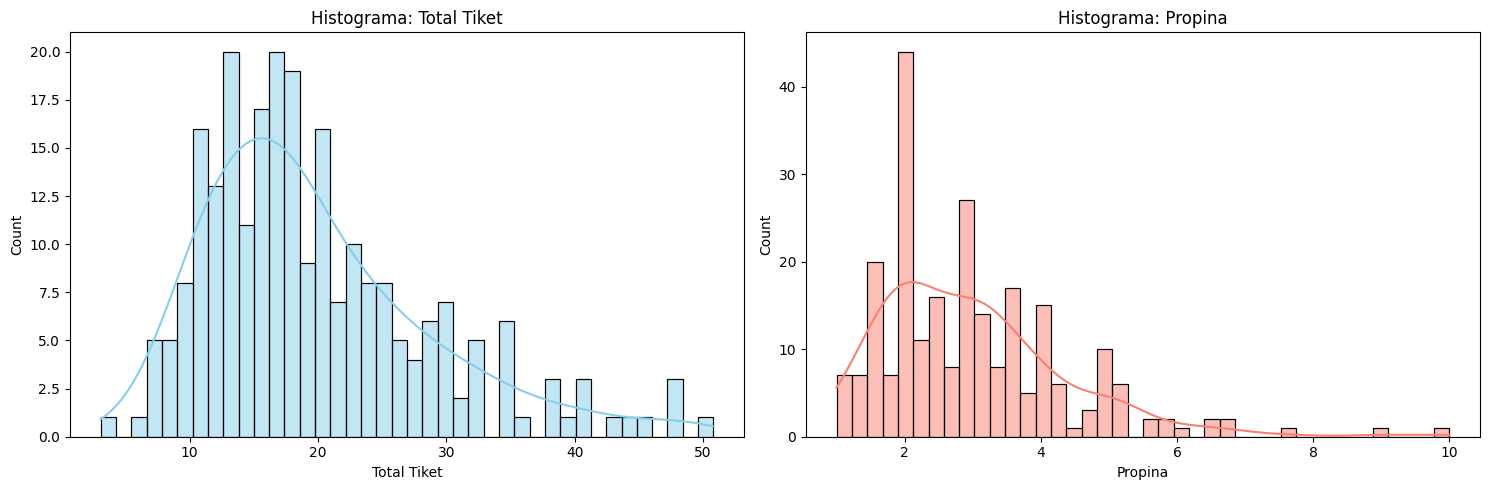

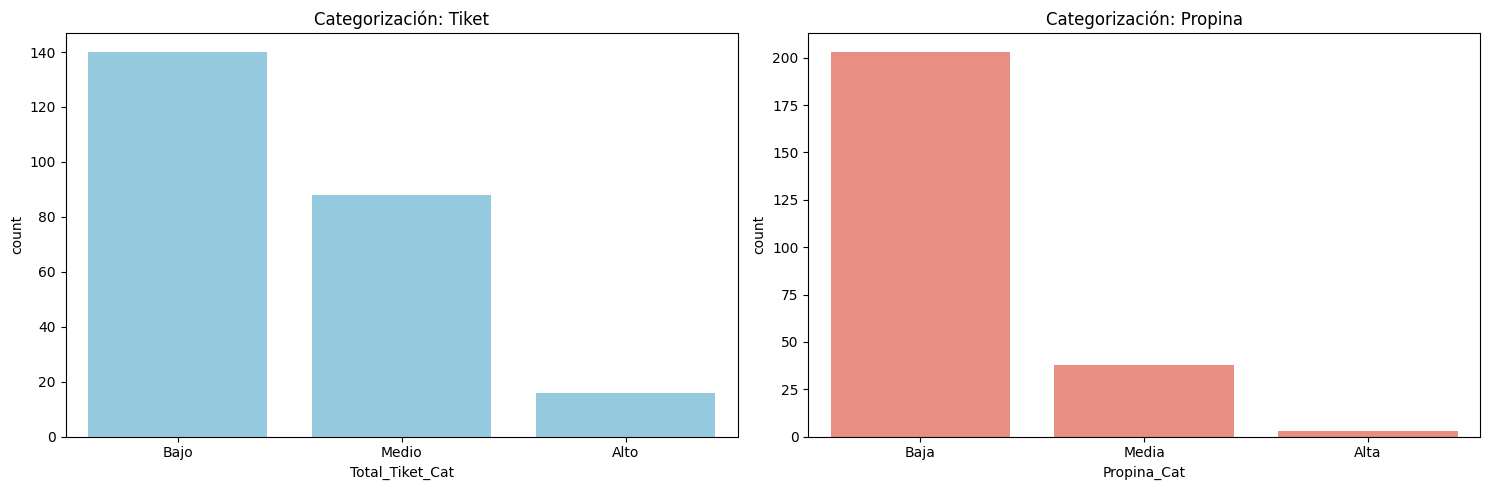

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(15,5))

# Histograma TOTAL TIKET
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Total Tiket', bins=40, kde=True, color='skyblue')
plt.title('Histograma: Total Tiket')

# Histograma PROPINA
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='Propina', bins=40, kde=True, color='salmon')
plt.title('Histograma: Propina')

plt.tight_layout()
plt.show()


plt.figure(figsize=(15,5))

# Grafico Barras : Frecuencia TOTAL_TIKET_CAT
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='Total_Tiket_Cat', color='skyblue')
plt.title('Categorización: Tiket')

# Grafico Barras :  Frecuencia PROPINA_CAT
plt.subplot(1, 2, 2)
sns.countplot(data=df, x='Propina_Cat', color='salmon')
plt.title('Categorización: Propina')

plt.tight_layout()
plt.show()


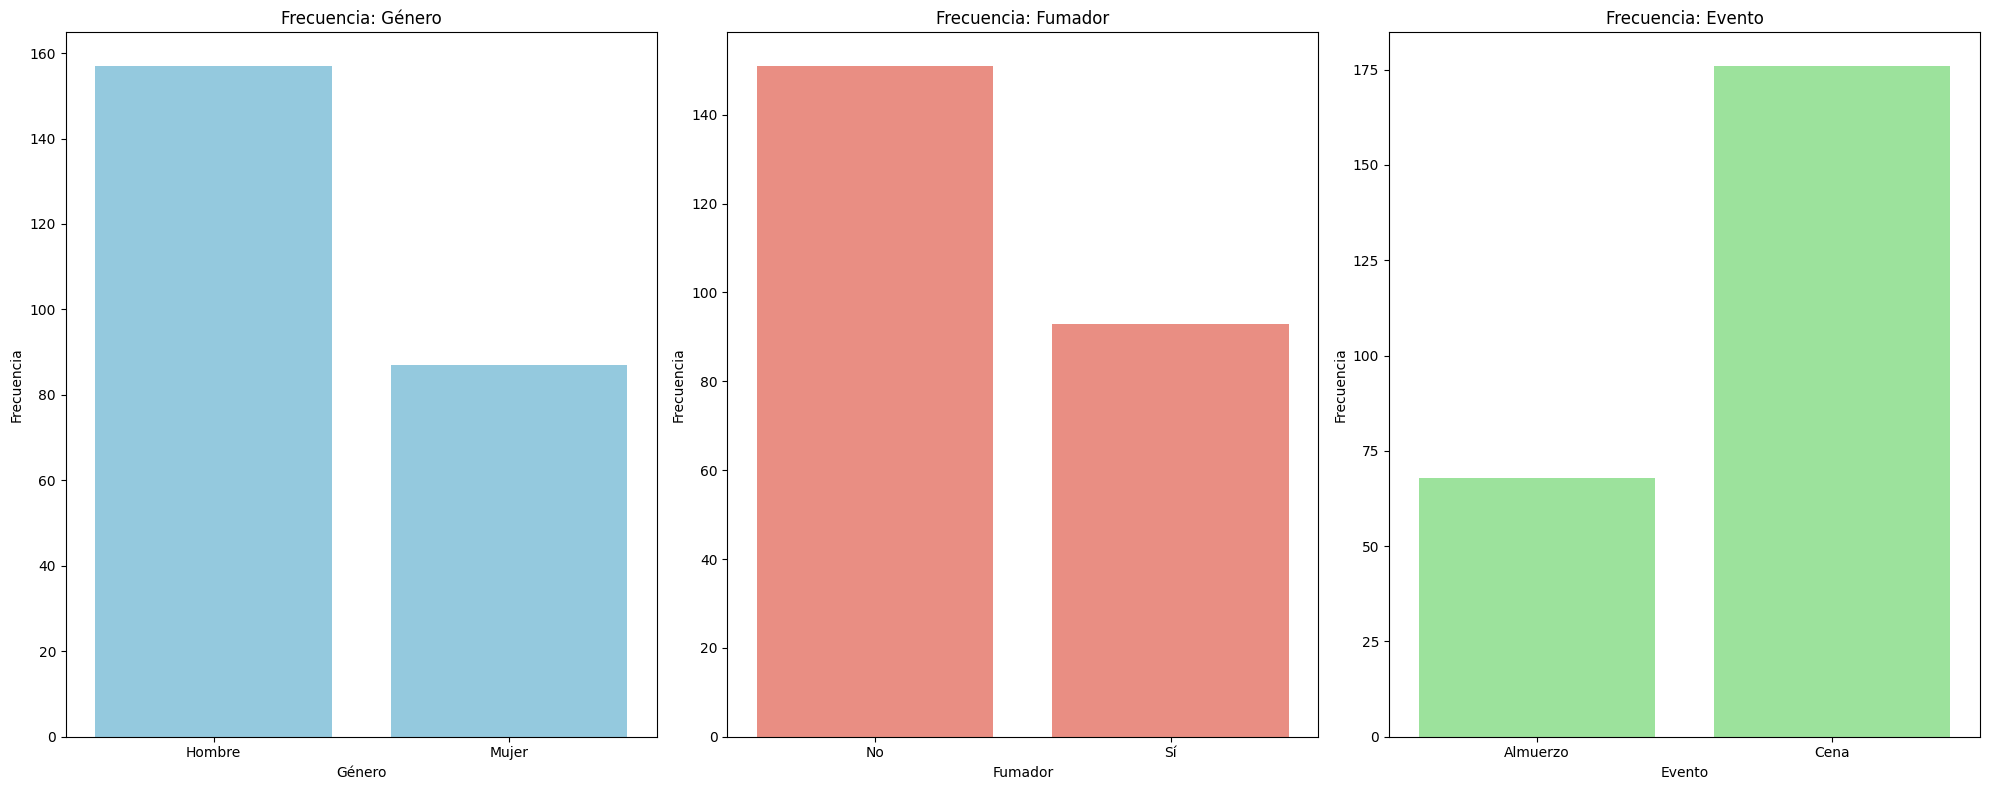

In [21]:
plt.figure(figsize=(20,8))

# Gráfico de frecuencia: GENERO
plt.subplot(1, 3, 1)
sns.countplot(data=df, x='Genero', color='skyblue')
plt.title('Frecuencia: Género')
plt.xlabel('Género')
plt.ylabel('Frecuencia')

# Gráfico de frecuencia: FUMADOR
plt.subplot(1, 3, 2)
sns.countplot(data=df, x='Fumador', color='salmon')
plt.title('Frecuencia: Fumador')
plt.xlabel('Fumador')
plt.ylabel('Frecuencia')

# Gráfico de frecuencia: EVENTO
plt.subplot(1, 3, 3)
sns.countplot(data=df, x='Evento', color='lightgreen')
plt.title('Frecuencia: Evento')
plt.xlabel('Evento')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()



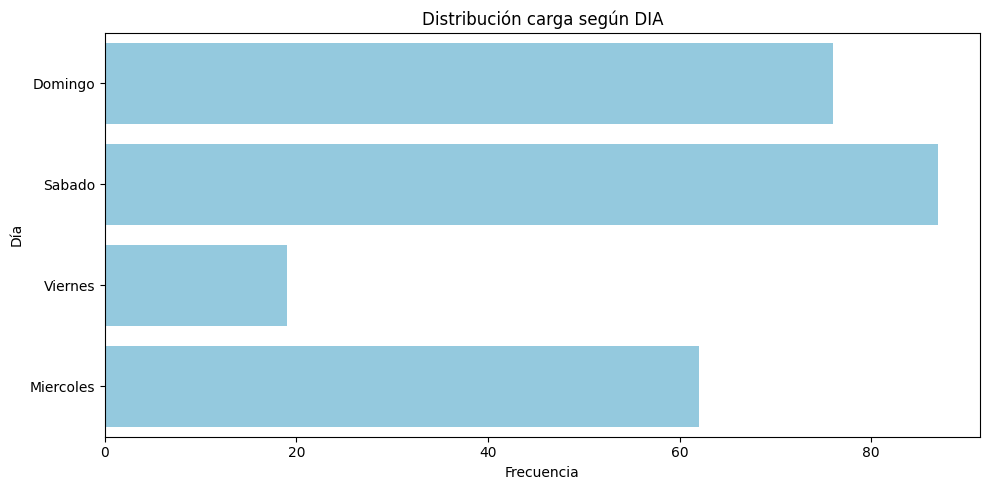

In [22]:
orden_dias = ['Domingo', 'Sabado', 'Viernes', 'Miercoles']

# Preparamos los datos ordenados
conteo = df['Dia'].value_counts().reindex(orden_dias)

plt.figure(figsize=(10,5))

sns.barplot(x=conteo.values, y=conteo.index, orient='h', color='skyblue')

plt.title('Distribución carga según DIA')
plt.xlabel('Frecuencia')
plt.ylabel('Día')

plt.tight_layout()
plt.show()


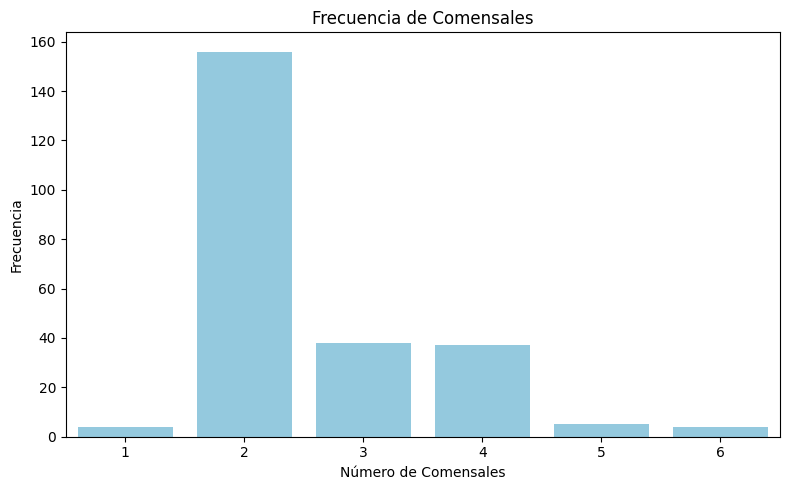

In [23]:
plt.figure(figsize=(8,5))

sns.barplot(
    x=df['Comensales'].value_counts().sort_index().index,
    y=df['Comensales'].value_counts().sort_index().values,
    color='skyblue'
)

plt.title('Frecuencia de Comensales')
plt.xlabel('Número de Comensales')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()



le frecuencia de dos comensales es notablemente superior.

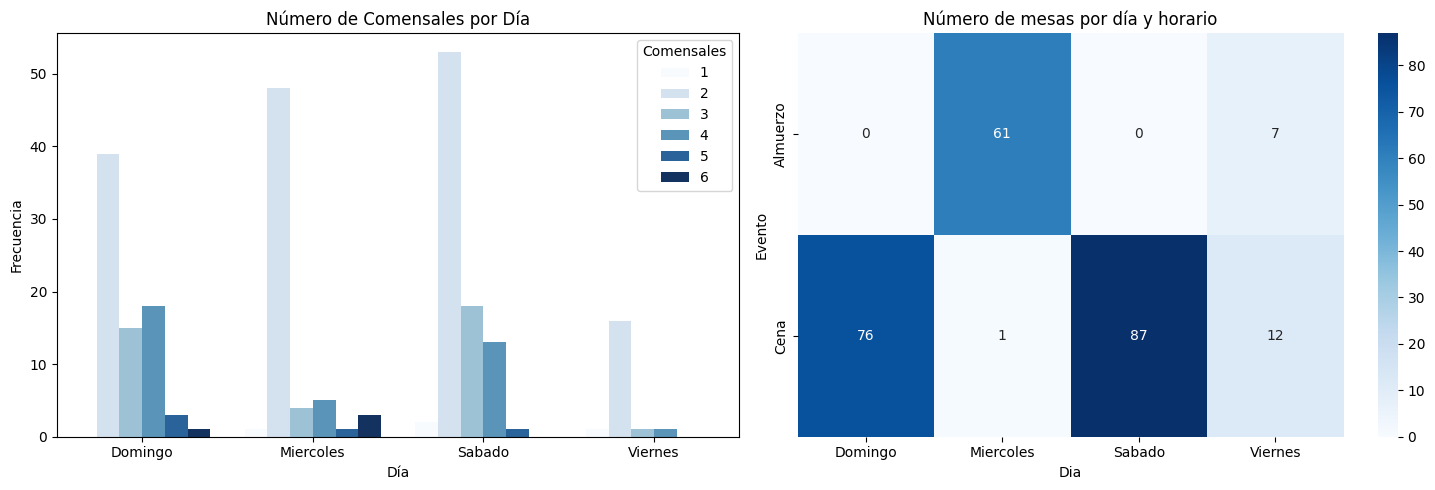

In [24]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)

sns.countplot( data=df, x='Dia', hue='Comensales', palette='Blues')
plt.title('Número de Comensales por Día')
plt.xlabel('Día')
plt.ylabel('Frecuencia')
plt.legend(title='Comensales')


plt.subplot(1, 2, 2)

conteo = pd.crosstab(df['Evento'], df['Dia'])
sns.heatmap(conteo, annot=True, fmt='d', cmap='Blues')
plt.title('Número de mesas por día y horario')


plt.tight_layout()
plt.show()


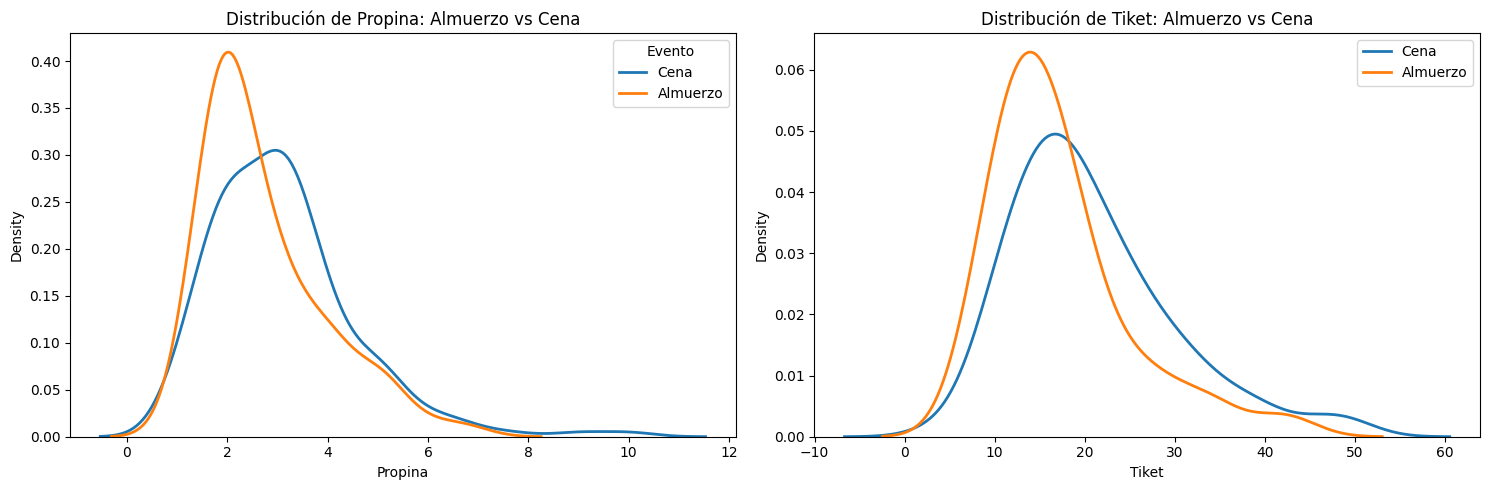

In [25]:
plt.figure(figsize=(15,5))


# KDE de PROPINA por EVENTO

plt.subplot(1, 2, 1)
sns.kdeplot(data=df[df['Evento'] == 'Cena'], x='Propina', label='Cena', linewidth=2)
sns.kdeplot(data=df[df['Evento'] == 'Almuerzo'], x='Propina', label='Almuerzo', linewidth=2)

plt.title('Distribución de Propina: Almuerzo vs Cena')
plt.xlabel('Propina')
plt.legend(title='Evento') 

# KDE de TOTAL TIKET por EVENTO

plt.subplot(1, 2, 2)
sns.kdeplot(data=df[df['Evento'] == 'Cena'], x='Total Tiket', label='Cena', linewidth=2)
sns.kdeplot(data=df[df['Evento'] == 'Almuerzo'], x='Total Tiket', label='Almuerzo', linewidth=2)

plt.title('Distribución de Tiket: Almuerzo vs Cena')
plt.xlabel('Tiket')
plt.legend()

plt.tight_layout()
plt.show()


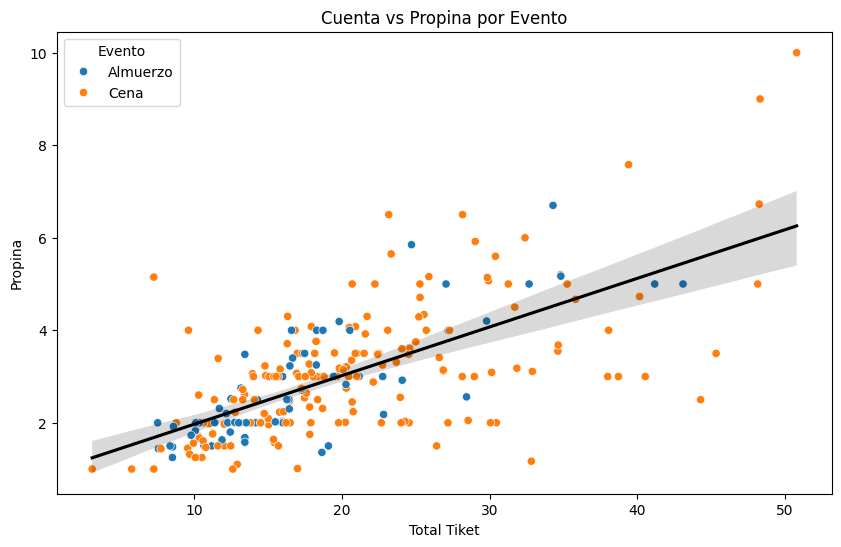

In [26]:
sns.scatterplot(data=df, x='Total Tiket', y='Propina', hue='Evento')
sns.regplot(data=df, x='Total Tiket', y='Propina', scatter=False, color='black')
plt.title('Cuenta vs Propina por Evento')
plt.show()


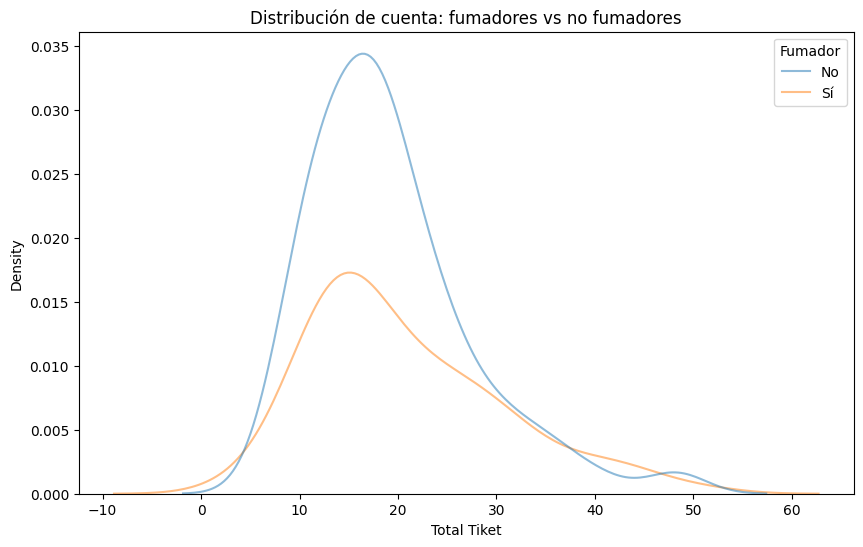

In [27]:
sns.kdeplot(data=df, x='Total Tiket', hue='Fumador', fill=False, alpha=0.5)
plt.title('Distribución de cuenta: fumadores vs no fumadores')
plt.show()

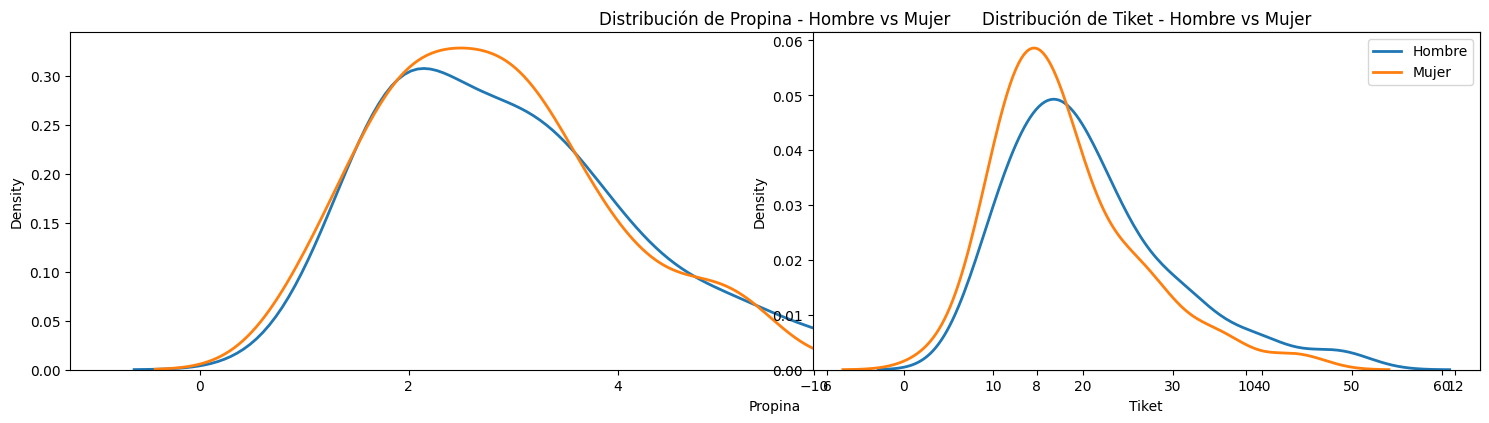

In [28]:
plt.figure(figsize=(15,5))

# KDE de PROPINA por GÉNERO

sns.kdeplot(data=df[df['Genero'] == 'Hombre'], x='Propina', label='Hombre', linewidth=2)
sns.kdeplot(data=df[df['Genero'] == 'Mujer'], x='Propina', label='Mujer', linewidth=2)

plt.title('Distribución de Propina - Hombre vs Mujer')
plt.xlabel('Propina')
plt.legend()


# KDE de TOTAL TIKET por GÉNERO

plt.subplot(1, 2, 2)
sns.kdeplot(data=df[df['Genero'] == 'Hombre'], x='Total Tiket', label='Hombre', linewidth=2)
sns.kdeplot(data=df[df['Genero'] == 'Mujer'], x='Total Tiket', label='Mujer', linewidth=2)

plt.title('Distribución de Tiket - Hombre vs Mujer')
plt.xlabel('Tiket')
plt.legend()

plt.tight_layout()
plt.show()


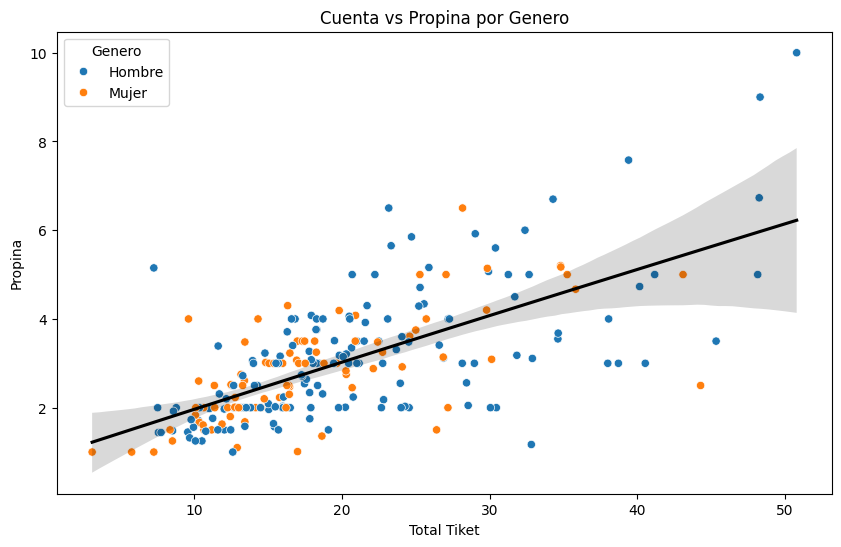

In [29]:
sns.scatterplot(data=df, x='Total Tiket', y='Propina', hue='Genero')
sns.regplot(data=df, x='Total Tiket', y='Propina', scatter=False, color='black', order=2)
plt.title('Cuenta vs Propina por Genero')
plt.show()

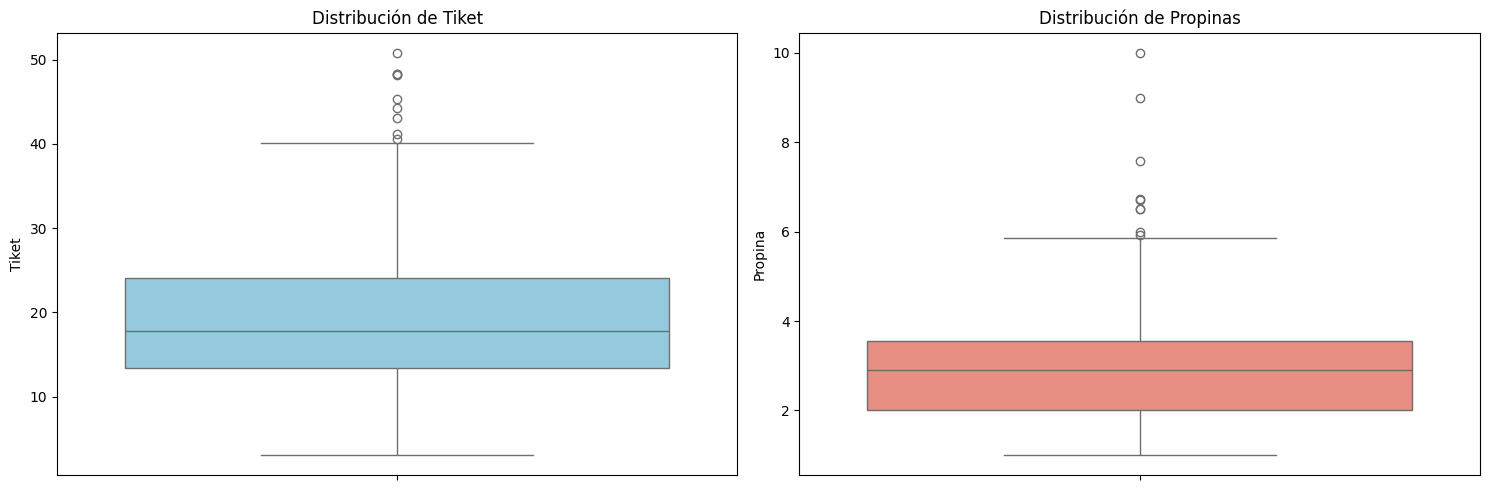

In [30]:
plt.figure(figsize=(15,5))

# Boxplot de Total Tiket
plt.subplot(1, 2, 1)
sns.boxplot(data=df, y='Total Tiket', color='skyblue')
plt.ylabel('Tiket')
plt.title('Distribución de Tiket')

# Boxplot de Propina
plt.subplot(1, 2, 2)
sns.boxplot(data=df, y='Propina', color='salmon')
plt.ylabel('Propina')
plt.title('Distribución de Propinas')

plt.tight_layout()


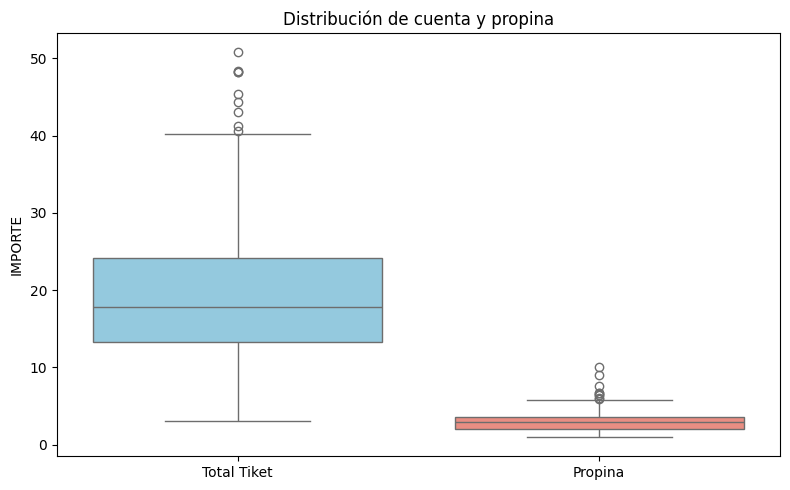

In [31]:
plt.figure(figsize=(8,5))

sns.boxplot(data=df[['Total Tiket', 'Propina']], palette=['skyblue', 'salmon'])

plt.ylabel('IMPORTE')
plt.title('Distribución de cuenta y propina')

plt.tight_layout()
plt.show()


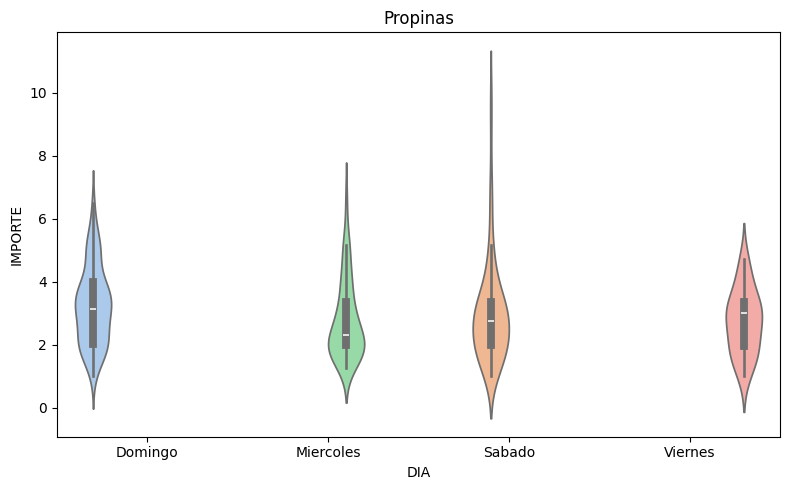

In [32]:
plt.figure(figsize=(8,5))

sns.violinplot(data=df, x='Dia', y='Propina', hue='Dia', palette='pastel', legend=False)

plt.title('Propinas')
plt.xlabel('DIA')
plt.ylabel('IMPORTE')

plt.tight_layout()
plt.show()



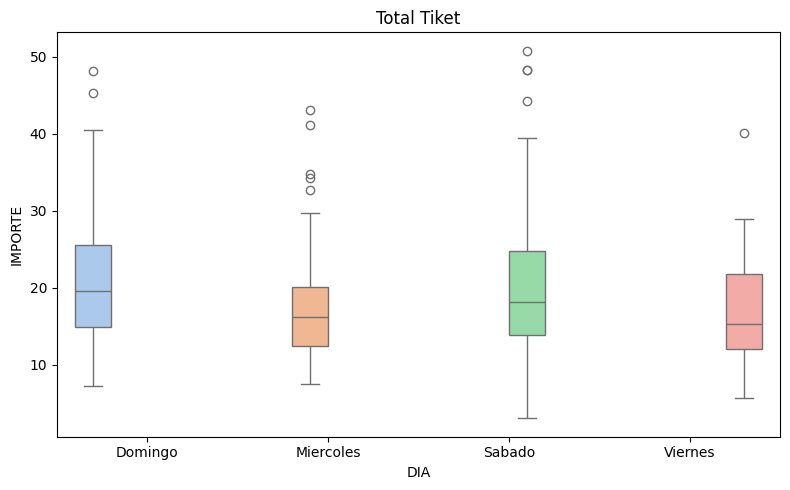

In [33]:
plt.figure(figsize=(8,5))

sns.boxplot(data=df, x='Dia',y='Total Tiket', hue='Dia', palette='pastel',legend=False)

plt.title('Total Tiket')
plt.xlabel('DIA')
plt.ylabel('IMPORTE')

plt.tight_layout()
plt.show()



### Graficos Bivariante

<Figure size 5500x500 with 0 Axes>

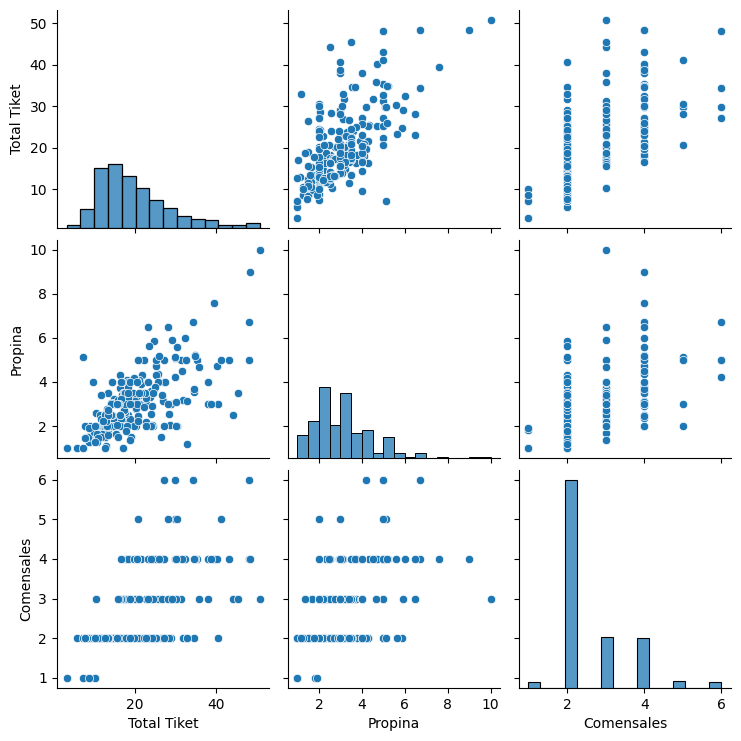

In [34]:
plt.figure(figsize=(55,5))
sns.pairplot(data=df, vars=['Total Tiket', 'Propina','Comensales'])
plt.show()

- Esta visualizacion nos muestra que la nube de puntos de Propina vs Total Tiket queda "bastante" alineada conla linea de regresion ( pendiente positiva), lo que sugiere una relacion lineal moderada. La nube de puntos de Comensales, siendo esta una feature tipo variable discreta, generando una banda vertical por cada valor. Dentro de cada banda hay bastante dispersion vertical y la recta es casi plana, indicandonos que la correlacion es debil.

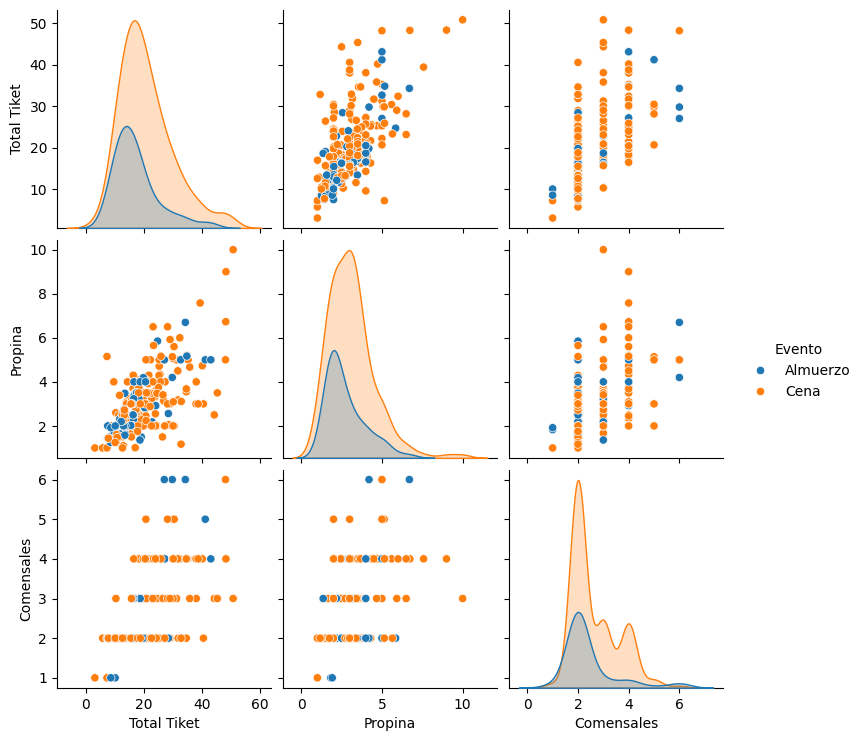

In [35]:
sns.pairplot(data=df, hue='Evento')
plt.show()

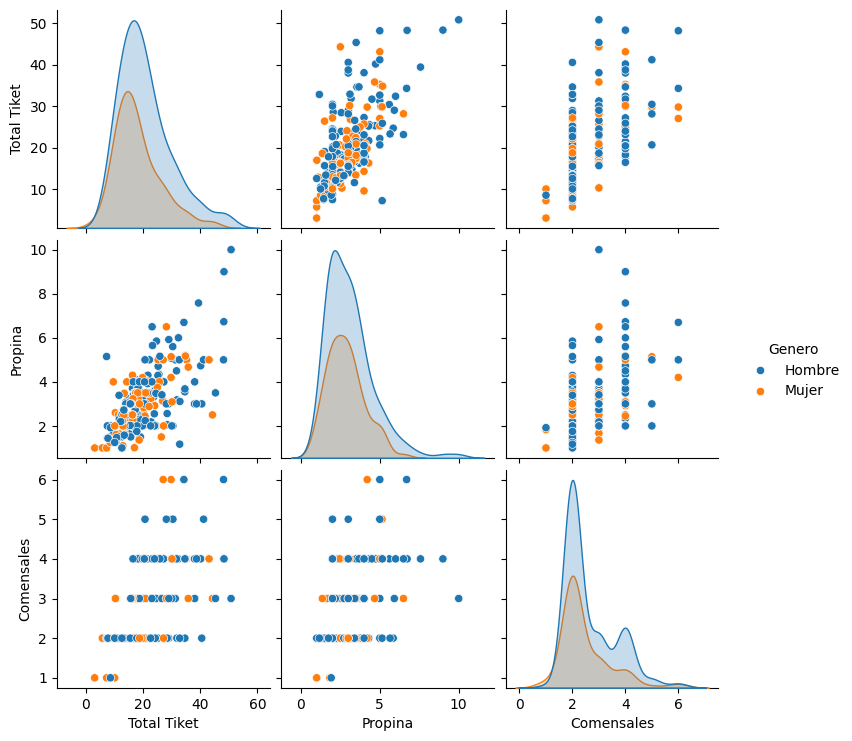

In [36]:
sns.pairplot(data=df, hue='Genero')
plt.show()

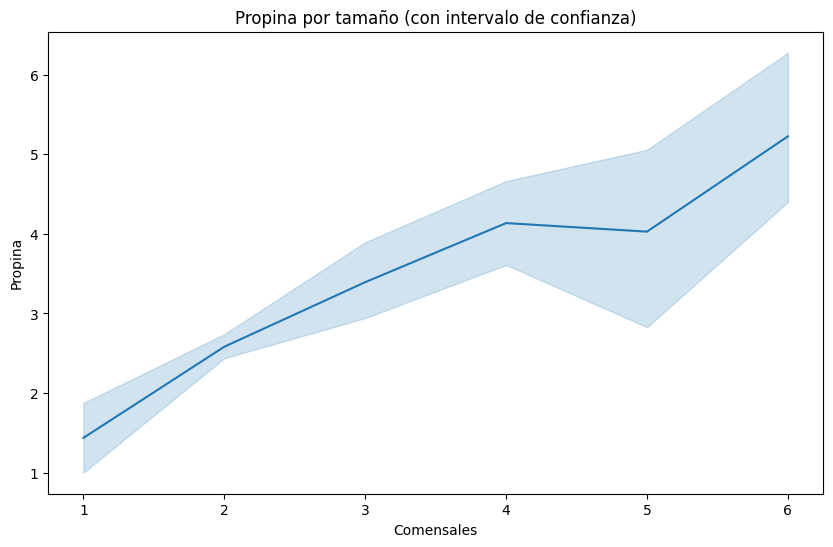

In [37]:
sns.lineplot(data=df, x='Comensales', y='Propina')
plt.title('Propina por tamaño (con intervalo de confianza)')
plt.show()

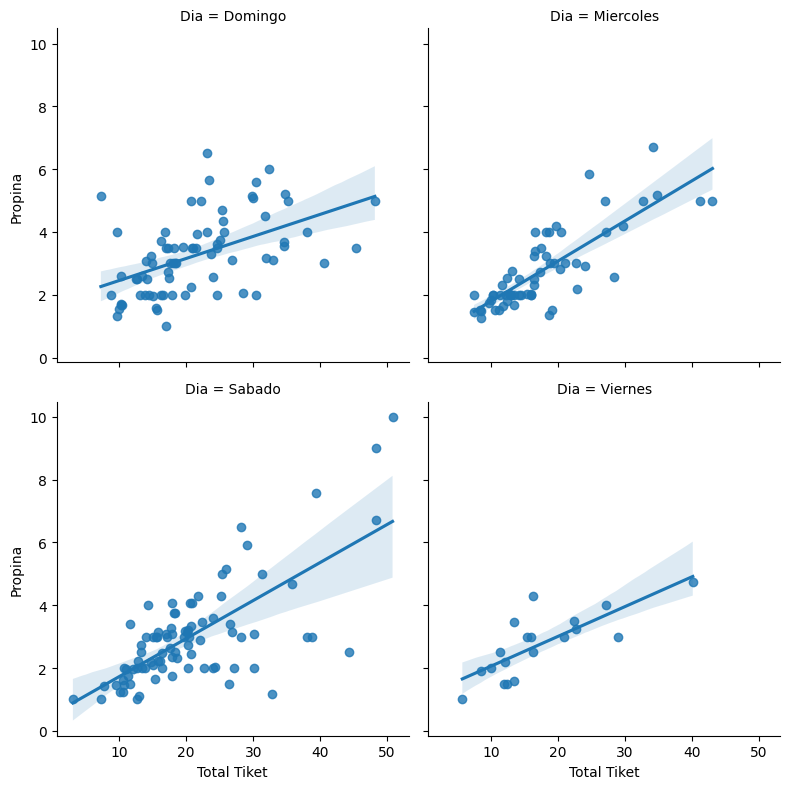

In [38]:
# Regresión separada por día
sns.lmplot(data=df, x='Total Tiket', y='Propina', col='Dia', col_wrap=2, height=4)
plt.show()

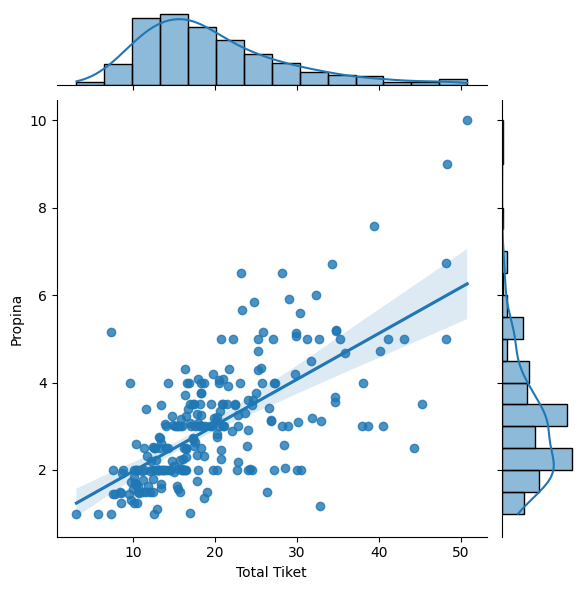

In [39]:
sns.jointplot(data=df, x='Total Tiket', y='Propina', kind='reg')
plt.show()

### Graficos Multivariantes

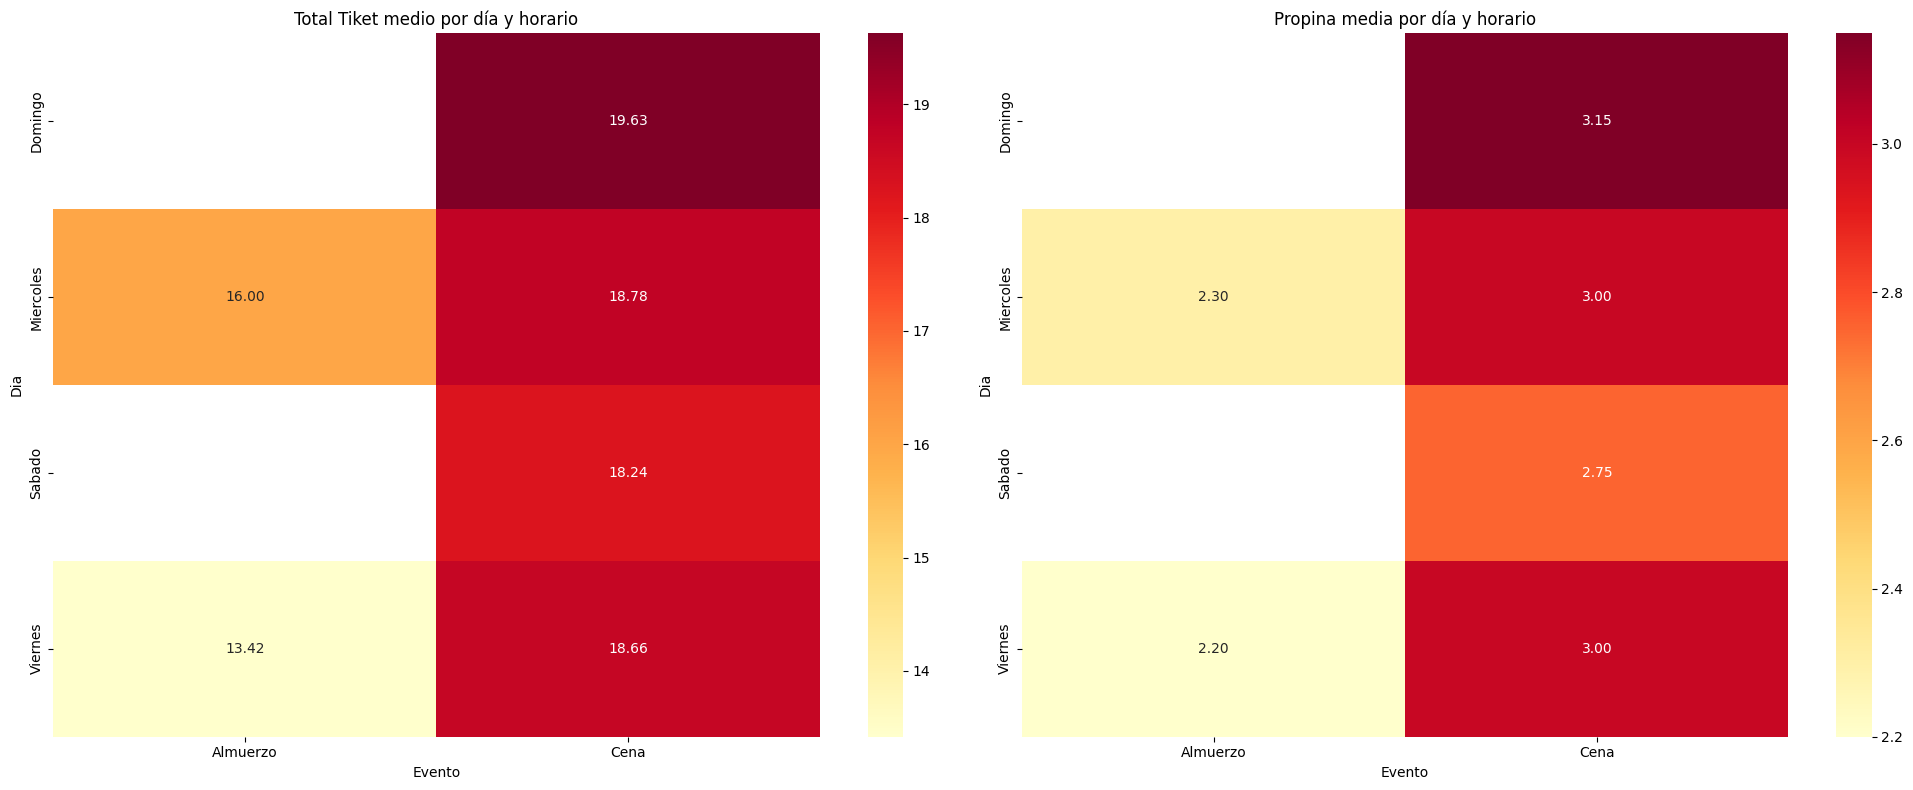

In [40]:
plt.figure(figsize=(20,8))

plt.subplot(1, 2, 1)
pivot = df.pivot_table(values='Total Tiket', index='Dia', columns='Evento', aggfunc='median', observed=True)
sns.heatmap(pivot, annot=True, fmt='.2f', cmap='YlOrRd')
plt.title('Total Tiket medio por día y horario')



plt.subplot(1, 2, 2)
pivot = df.pivot_table(values='Propina', index='Dia', columns='Evento', aggfunc='median', observed=True)
sns.heatmap(pivot, annot=True, fmt='.2f', cmap='YlOrRd')
plt.title('Propina media por día y horario')

plt.tight_layout()
plt.show()

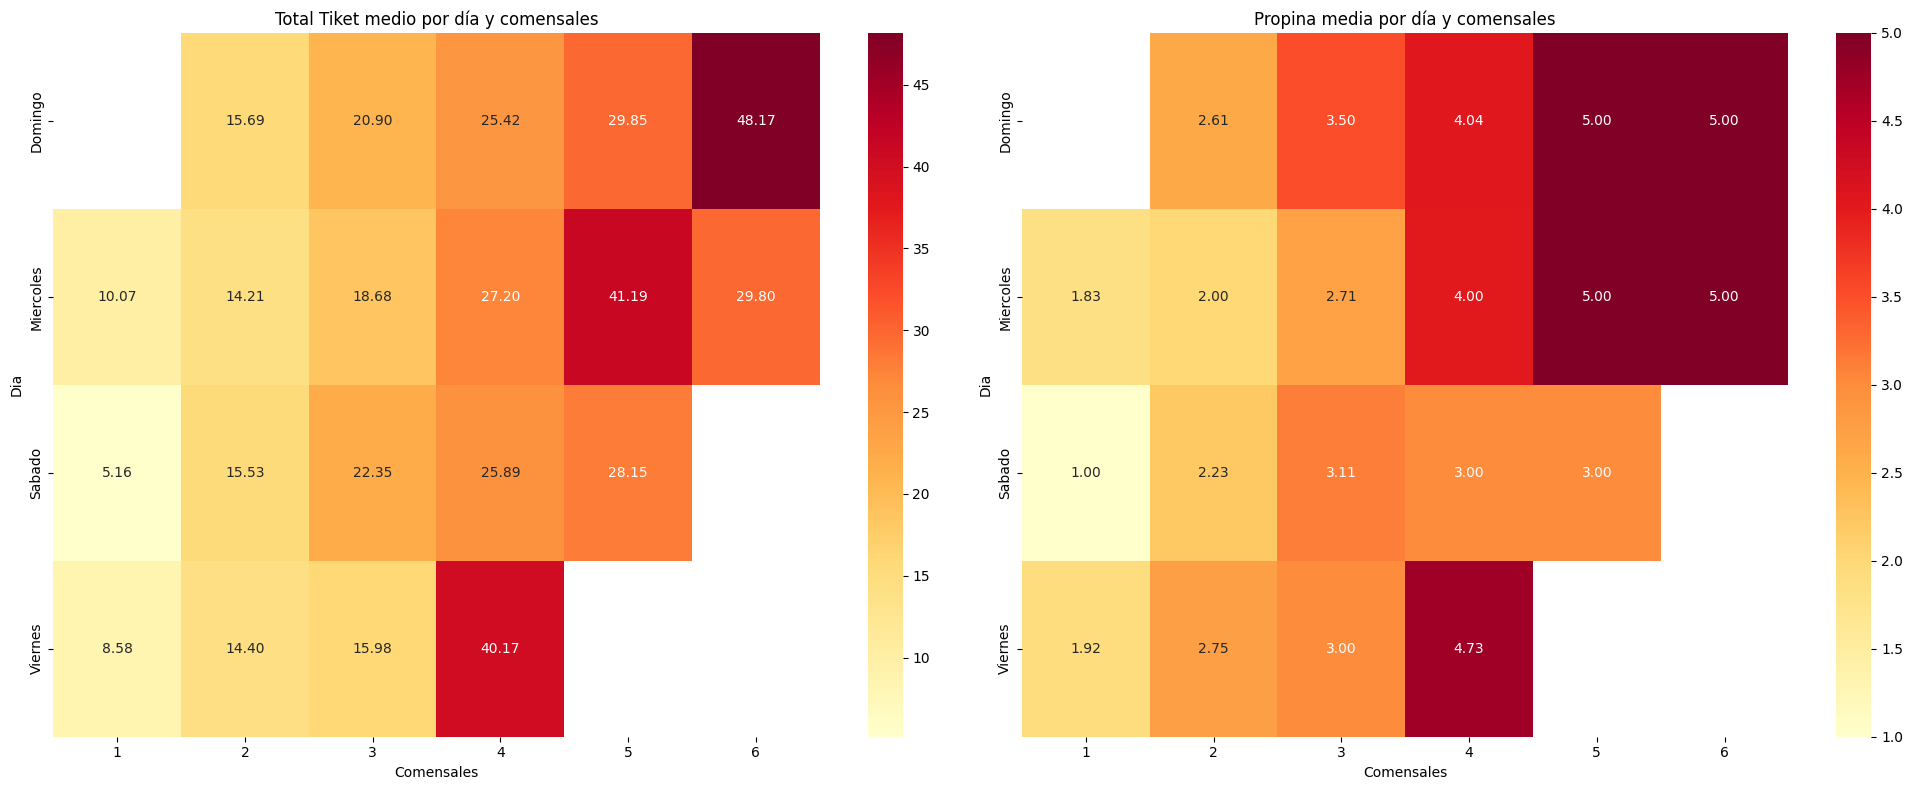

In [41]:
plt.figure(figsize=(20,8))

plt.subplot(1, 2, 1)
pivot = df.pivot_table(values='Total Tiket', index='Dia', columns='Comensales', aggfunc='median', observed=True)
sns.heatmap(pivot, annot=True, fmt='.2f', cmap='YlOrRd')
plt.title('Total Tiket medio por día y comensales')



plt.subplot(1, 2, 2)
pivot = df.pivot_table(values='Propina', index='Dia', columns='Comensales', aggfunc='median', observed=True)
sns.heatmap(pivot, annot=True, fmt='.2f', cmap='YlOrRd')
plt.title('Propina media por día y comensales')

plt.tight_layout()
plt.show()

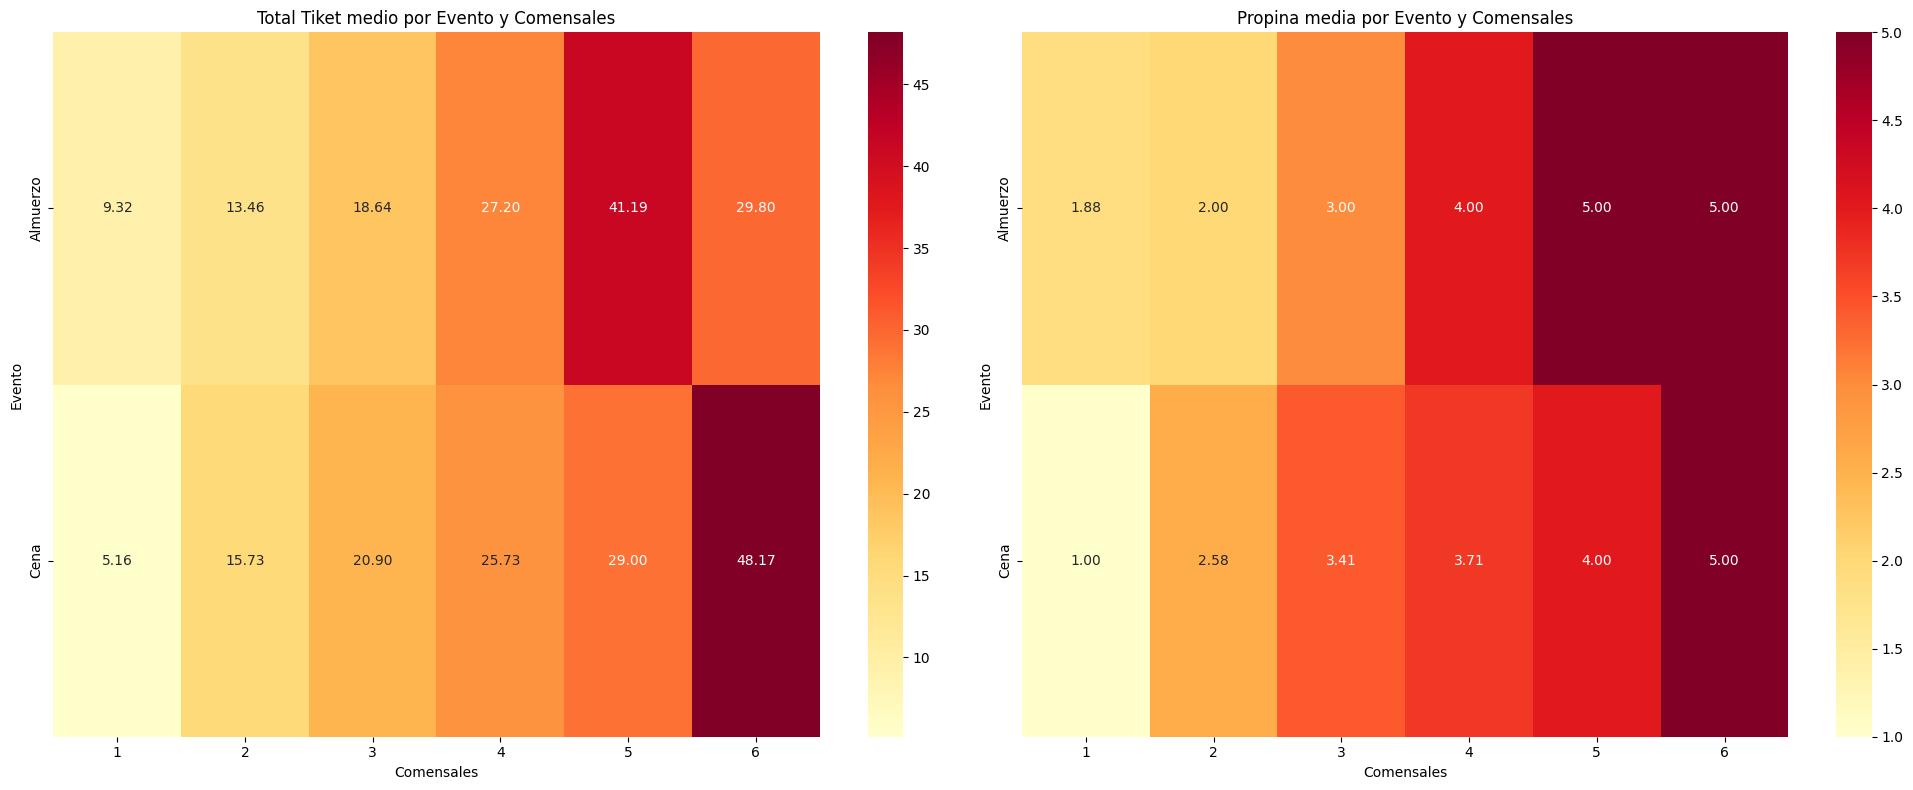

In [42]:
plt.figure(figsize=(20,8))

plt.subplot(1, 2, 1)
pivot = df.pivot_table(values='Total Tiket', index='Evento', columns='Comensales', aggfunc='median', observed=True)
sns.heatmap(pivot, annot=True, fmt='.2f', cmap='YlOrRd')
plt.title('Total Tiket medio por Evento y Comensales')



plt.subplot(1, 2, 2)
pivot = df.pivot_table(values='Propina', index='Evento', columns='Comensales', aggfunc='median', observed=True)
sns.heatmap(pivot, annot=True, fmt='.2f', cmap='YlOrRd')
plt.title('Propina media por Evento y Comensales')

plt.tight_layout()
plt.show()

## 6.Preparar feature


#### Encoding  
- Se realizan dos formade encoding para practicar tanto en Panda como en Scikit Learn
  Para el modelo utilizaremos el df_modelo_scikit

In [43]:
# copio del df original para evitar perder info
df_modelo_panda= df.copy()

# elimino columnas no necesarias
df_modelo_panda=df_modelo_panda.drop(columns=['Total_Tiket_Cat', 'Propina_Cat'])

#  Mapeo feature [Genero - Fumador - Evento]
df_mapeo = pd.DataFrame() # creo un nuevo dataframe
df_mapeo["Genero"]=df['Genero'].map({'Mujer':1,'Hombre':0})
df_mapeo["Fumador"]=df['Fumador'].map({'Sí':1,'No':0})
df_mapeo["Evento"]=df['Evento'].map({'Cena':1,'Almuerzo':0})

# Dummies feature [Dia]
df_dummies = pd.get_dummies(df['Dia'], prefix = 'Dia', drop_first=True)  #  drop_first evita multicolinealidad, descartamndo una de las varaibles (la primera --> Dia_domingo)
df_dummies = df_dummies.astype(int)  # cambio el tipo categoria de 'Dia' a int 

# Feature numericas
df_numerico = df.select_dtypes(include=['int64','float64'])

# Agrupo en un unico modelo
df_modelo_panda = pd.concat([df_numerico,df_mapeo, df_dummies], axis=1)

print(df_modelo_panda.sample(5)) 


     Total Tiket  Propina  Comensales Genero Fumador Evento  Dia_Miercoles  \
134        18.26     3.25           2      1       0      0              1   
82         10.07     1.83           1      1       0      0              1   
236        12.60     1.00           2      0       1      1              0   
101        15.38     3.00           2      1       1      1              0   
5          25.29     4.71           4      0       0      1              0   

     Dia_Sabado  Dia_Viernes  
134           0            0  
82            0            0  
236           1            0  
101           0            1  
5             0            0  


 - Lo mismo pero utilizando Scikit Learn

In [44]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

# copio del df original para evitar perder info
df_modelo_scikit = df.copy()

# Eliminar columnas no necesarias
df_modelo_scikit = df_modelo_scikit.drop(columns=['Total_Tiket_Cat', 'Propina_Cat'])

# Columnas binarias con  OrdinalEncoder
cols_binarias = ['Genero', 'Fumador', 'Evento']   # creo las columnas

ordinal = OrdinalEncoder(categories=[     
    ['Hombre', 'Mujer'],   # Genero
    ['No', 'Sí'],          # Fumador
    ['Almuerzo', 'Cena']   # Evento
])

df_mapeo = pd.DataFrame(
    ordinal.fit_transform(df_modelo_scikit[cols_binarias]),
    columns=cols_binarias
)

# OneHotEncoder para Dia
cols_dia = ['Dia']
onehot = OneHotEncoder(drop='first', sparse_output=False)  # drop = first  evita multicolinealidad

df_dummies = pd.DataFrame(
    onehot.fit_transform(df_modelo_scikit[cols_dia]),
    columns=onehot.get_feature_names_out(cols_dia)
)

# Numéricas
df_numerico = df_modelo_scikit.select_dtypes(include=['int64', 'float64'])

# Unir todo
df_modelo_scikit = pd.concat([df_numerico, df_mapeo, df_dummies], axis=1)

print(df_modelo_scikit.sample(5))

     Total Tiket  Propina  Comensales  Genero  Fumador  Evento  Dia_Miercoles  \
125        29.80     4.20           6     1.0      0.0     0.0            1.0   
86         13.03     2.00           2     0.0      0.0     0.0            1.0   
236        12.60     1.00           2     0.0      1.0     1.0            0.0   
76         17.92     3.08           2     0.0      1.0     1.0            0.0   
40         16.04     2.24           3     0.0      0.0     1.0            0.0   

     Dia_Sabado  Dia_Viernes  
125         0.0          0.0  
86          0.0          0.0  
236         1.0          0.0  
76          1.0          0.0  
40          1.0          0.0  


<Figure size 5500x500 with 0 Axes>

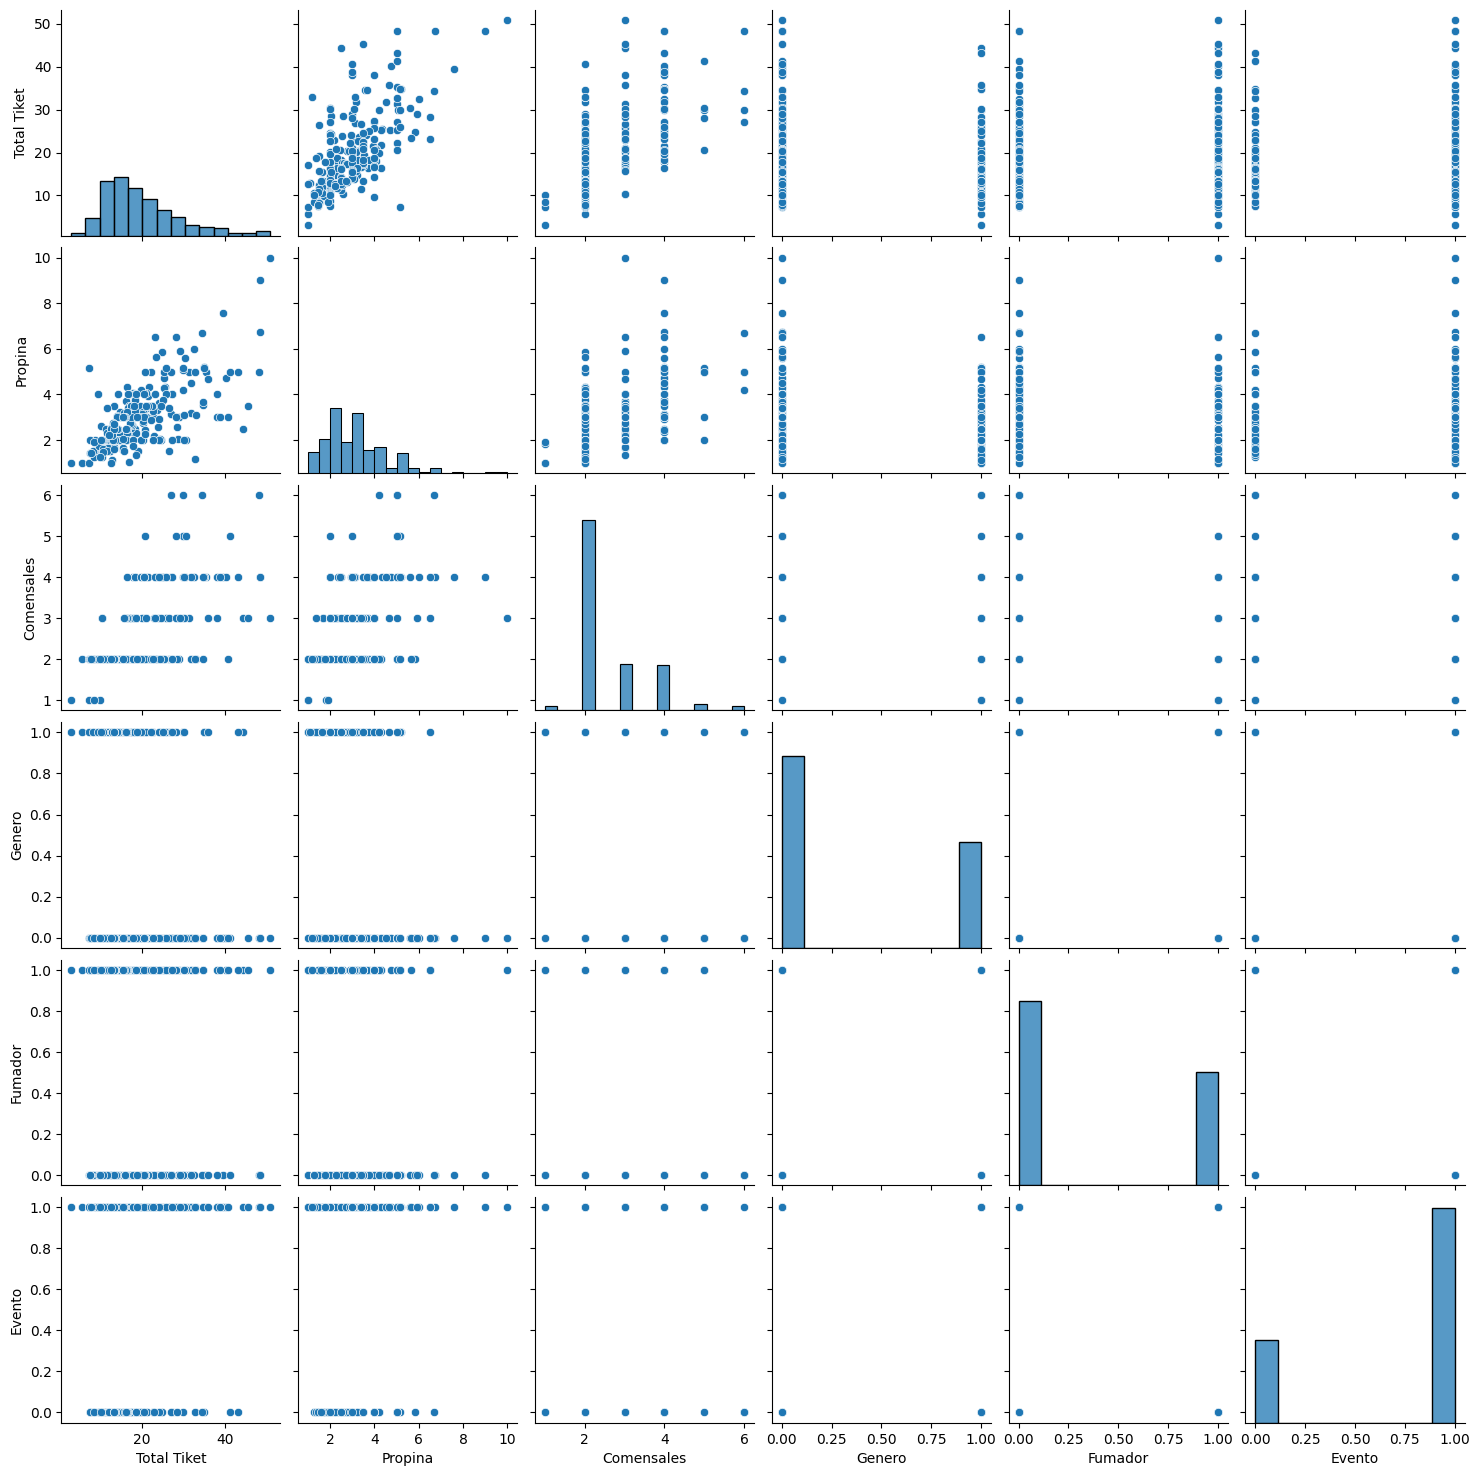

In [45]:
plt.figure(figsize=(55,5))
sns.pairplot(data=df_modelo_scikit, vars=['Total Tiket', 'Propina','Comensales','Genero','Fumador','Evento'])
plt.show()

<Axes: >

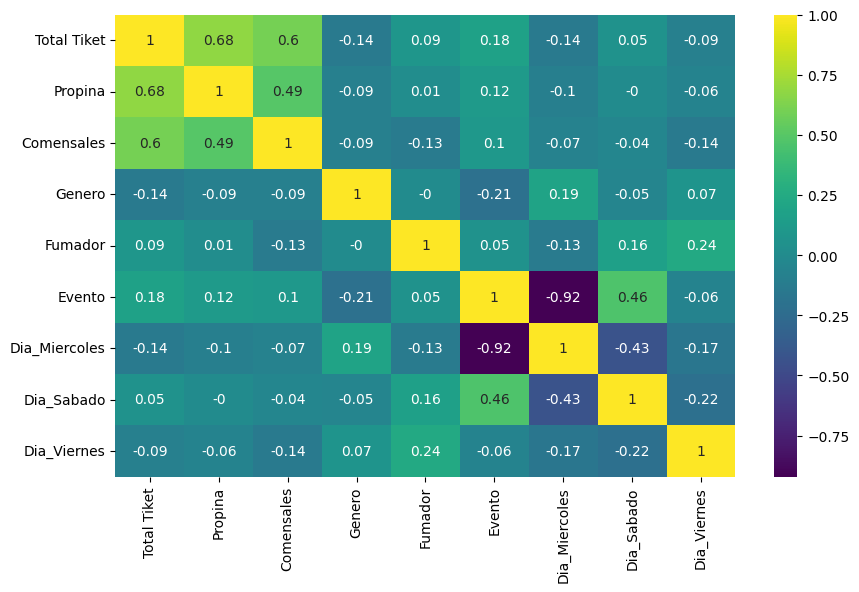

In [46]:
sns.heatmap(df_modelo_scikit.corr(numeric_only=True).round(2), annot=True, cmap='viridis' )

- En analisi anterior, donde se contemplaron solo variables numericas , detectamos que la variable que mejor correlacion tenia con Propina era Total Tiket, y despues del embedding seguimos confirmando este hecho.

- Aunquye todas tienen cierto grado de correlacion entre si, viendo el grafico podemos admitir que hay pocas variables que se correlacionen bien y son Total Tiket y Comensales.

- La correlacion entre Evento y Dia_Miercoles merece atencion por presentar valores por encima de 0.7 y -0.7 que manifiestan riesgo de Multicolinealidad. La interpretacion individual de cada coerficiente es probablemente poco fiable.

## 7.Entrenar modelo

- importamos:  el modelo, el train y las metricas necesarias 

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (mean_absolute_error,mean_squared_error,root_mean_squared_error, r2_score,mean_absolute_percentage_error)

- probaremos dos mdoelos Linear Regresion ( mas preciso y siempre el mismo para dataset pequeños) y SGDR (estocastico( cambia cada vez, "evoluciona") impreciso para data set mas grandes), para ver las diferencias.

#### Una Feature
 Opcion 1 : Elegimos una sola feature. Probaremos con Total Tiket.

In [48]:
# Preparamos la feature
X=df_modelo_scikit[['Total Tiket']]
y=df_modelo_scikit['Propina']



# Particiononamos los datos para Entrenamiento y test (80-20)
X_train , X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2 , random_state=42)

# Mostramos el reparto
print(f"Muestras de entrenamiento: {len(X_train)}")
print(f"Muestras de test: {len(X_test)}")

# Creamos el modelo 
model= LinearRegression()

# ENTRENAMIENTO 
model.fit(X,y) 

r2_train = model.score(X_train, y_train)
r2_test = model.score(X_test, y_test)
print(f"\nR² en entrenamiento: {r2_train:.4f}")
print(f"R² en test: {r2_test:.4f}\n")


# PREDICION 
y_pred = model.predict(df_modelo_scikit[['Total Tiket']])

print (f'r2: {r2_score(y, y_pred):.4f}')
print (f'MAE: {mean_absolute_error(y,y_pred):.4f}')
print (f'RMSE: {root_mean_squared_error(y,y_pred):.4f}')
print (f'MSE: {mean_squared_error (y, y_pred):.4f}\n')

# Acceso a los coeficientes ( calculado en el entrenamiento)
 
# Coeficiente (pendiente)
print(f"Pendiente (β₁): {model.coef_[0]:.4f}")

# mediana
print(f"Valor_Medio_Propina: {df_modelo_scikit['Propina'].median():.4f}")


Muestras de entrenamiento: 195
Muestras de test: 49

R² en entrenamiento: 0.4298
R² en test: 0.5607

r2: 0.4566
MAE: 0.7458
RMSE: 1.0179
MSE: 1.0360

Pendiente (β₁): 0.1050
Valor_Medio_Propina: 2.9000


Prueba aplicando un filtto para no contemplar valores Outlier

In [49]:
mask = df_modelo_scikit['Total Tiket'] < ls_ticket
X = df_modelo_scikit.loc[mask, ['Total Tiket']]
y = df_modelo_scikit.loc[mask, 'Propina']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print(f"R² en entrenamiento: {r2_score(y_train, y_pred_train):.4f}")
print(f"R² en test: {r2_score(y_test, y_pred_test):.4f}")
print(f"RMSE test: {root_mean_squared_error(y_test, y_pred_test):.4f}")

R² en entrenamiento: 0.4121
R² en test: 0.3842
RMSE test: 1.0743


- El valor de la pendiente es bajo (0.11), cada vez que x aumenta en 1 unidad, la prediccion aumenta de 0.11 unidades, por lo tanto la variable no influye tanto sobre la prediccion de y
  Faltan valores importantes.
- r2 es moderado (0.45), solo explica el 45% de la variabilidad de y,  por lo tanto el modelo no captura bien la variabilidad.
- MAE de (0.75) en promedio el modelo se equivoca en 0.75 unidades.
- RMSE de (1.01) El error son relativamente altos respecto al valor medio, segun  por lo tanto la predicion no es muy precisa.El modelo no esta capturando bien la relacion.
- La relacion es debil entre variable de entrada ( independiente) y variable de salida predicta ( dependiente) 
- En el test tenemos mejores resultados r2 puede estar influenciado por algun valor. Abria que revisar.

- se ha probado a aplicar un filtro para evitar la influencia de los outlier pero los datos han empeorado. Es prefeible contemplar todos los datos.

Puede resultar insuficiente utilizar unicamente Total Tiket para predecir bien la propina.

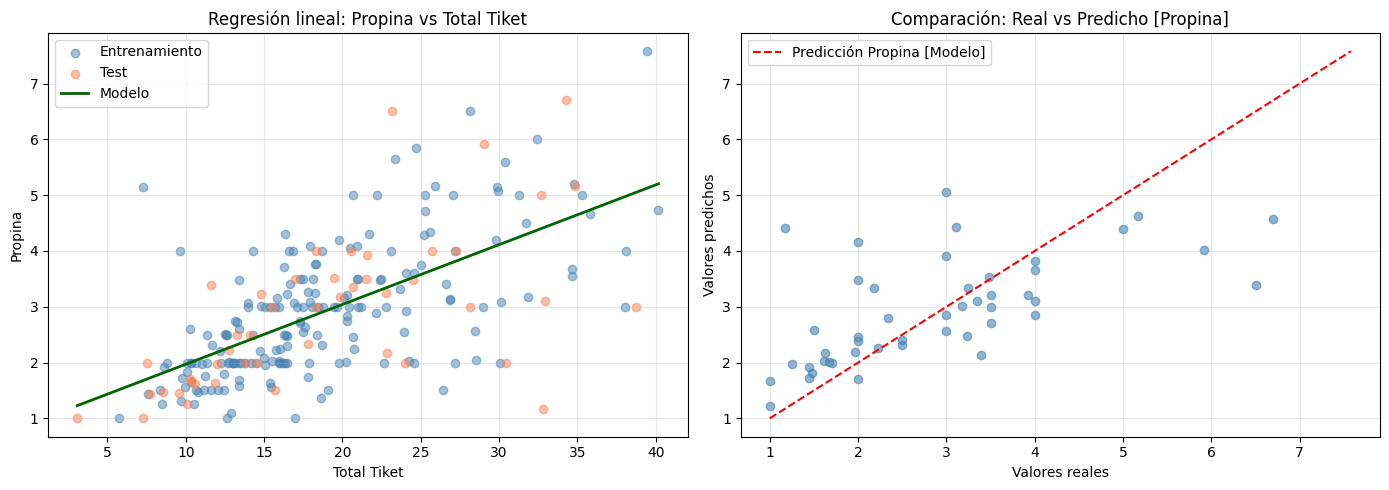

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de dispersión con regresión
ax1 = axes[0]
ax1.scatter(X_train, y_train, alpha=0.5, label='Entrenamiento', color='steelblue')
ax1.scatter(X_test, y_test, alpha=0.5, label='Test', color='coral')

X_plot = pd.DataFrame(
    np.linspace(X['Total Tiket'].min(), X['Total Tiket'].max(), 100),
    columns=['Total Tiket']
)
y_plot = model.predict(X_plot)
ax1.plot(X_plot, y_plot, color='darkgreen', linewidth=2, label='Modelo')

ax1.set_xlabel('Total Tiket')
ax1.set_ylabel('Propina')
ax1.set_title('Regresión lineal: Propina vs Total Tiket')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Gráfico de valores reales vs predichos
ax2 = axes[1]
y_pred_test = model.predict(X_test)
ax2.scatter(y_test, y_pred_test, alpha=0.6, color='steelblue')
ax2.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', linewidth=1.5, label='Predicción Propina [Modelo]')

ax2.set_xlabel('Valores reales')
ax2.set_ylabel('Valores predichos')
ax2.set_title('Comparación: Real vs Predicho [Propina]')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

- El grafico de regresion de la derecha evidencia que la predicion no son muy precisas
- El grafico de regresion de la izquierda muestra que el modelo atraviesa la nube de puntos y los valores son mas o menos equidistantes del modelo.

In [51]:
# Cálculo de residuos
residuos = y - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(df_modelo_scikit['Total Tiket'], residuos, alpha=0.6, color='purple')
plt.axhline(0, color='black', linestyle='--', linewidth=2)

plt.xlabel('Total Ticket')
plt.ylabel('Residuo (y - y_pred)') # Diferencia entre valor real y valor predicho
plt.title('Gráfico de Residuos: Total del Ticket vs Residuo')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


ValueError: operands could not be broadcast together with shapes (235,) (244,) 

- la gran nube ( mucha dispersion) nos indica y confirma que el modelo con una sola feature no es capaz de capturar bien la varaibilidad. 
  Faltan variables importantes.
  Cuanto mas grandes es el valor del tiket, mas grande es el residuo.

- Muestra de Prediciones con una variable.( realizado para practicar).
  utilizaremos valores aleatorios de la feature del dataframe 

In [ ]:
valores_random = df_modelo_scikit[['Total Tiket']].sample(n=5, random_state=42)
predicciones = model.predict(valores_random)

for ticket, pred in zip(valores_random['Total Tiket'].to_numpy(), predicciones):
    print(f"Ticket: {ticket:.2f} € → Propina estimada: {pred:.2f} €")

Ticket: 19.82 € → Propina estimada: 3.05 €
Ticket: 8.77 € → Propina estimada: 1.86 €
Ticket: 24.55 € → Propina estimada: 3.55 €
Ticket: 25.89 € → Propina estimada: 3.69 €
Ticket: 13.00 € → Propina estimada: 2.32 €


#### Varias  Feature

Opcion 2: Probamos cada feature por separado, haciendo un bucle para iterar todas las columnas 

In [ ]:
df_resultados = []

predictores = ['Total Tiket', 'Comensales', 'Genero', 'Fumador','Evento', 'Dia_Miercoles', 'Dia_Sabado', 'Dia_Viernes']

for predictor in predictores:
    X = df_modelo_scikit[[predictor]]
    y = df_modelo_scikit['Propina']

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42        
    )

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    df_resultados.append({
        'Modelo': f'RLS {predictor}',    # Regresion Lineal Simple 
        'Predictor': predictor,
        'Coeficiente (β₁)': model.coef_[0],
        'R2': r2_score(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred),
        'RMSE': root_mean_squared_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred)
    })

df_resultados = pd.DataFrame(df_resultados)

accuracy = model.score(X_test, y_test)
print(f"Accuracy en test: {accuracy:.4f}")
print(f"r2 en TRAIN : {r2_score(y_train, y_pred_train):.4f}")
print(f"r2 en TEST: {r2_score(y_test, y_pred_test):.4f}\n")
print(f"RMSE en TRAIN : {np.sqrt(mean_squared_error(y_train, y_pred_train)):.4f}")
print(f"RMSE en TEST : {np.sqrt(mean_squared_error(y_test, y_pred_test)):.4f}")


Accuracy en test: -0.1649
r2 en TRAIN : 0.0041
r2 en TEST: -0.1649

RMSE en TRAIN : 1.4224
RMSE en TEST : 1.2067


- no hay sobreajuste pero en ambos casos el train y el test son igual de malos ( R2) y el RMSE son alto y muy parecidos.

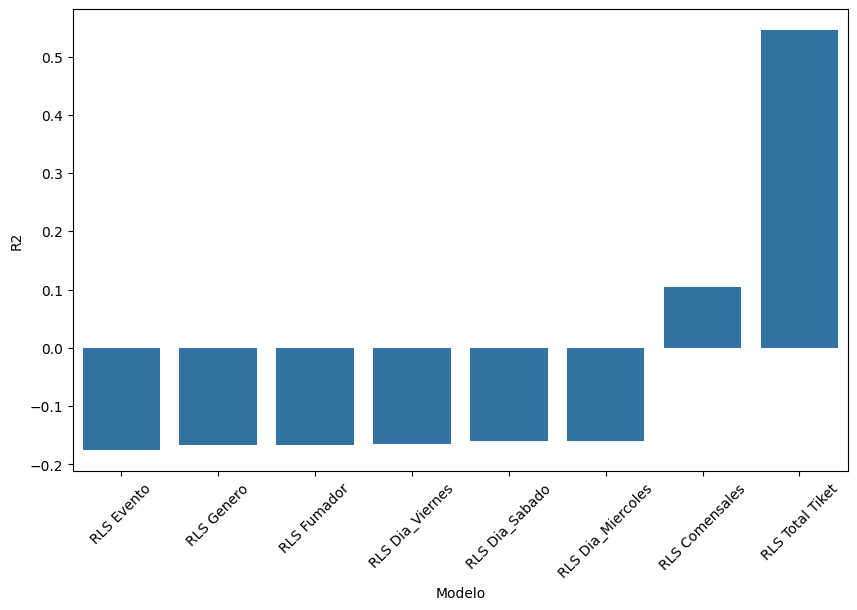

In [ ]:
sns.barplot(df_resultados.sort_values('R2'), x='Modelo', y='R2')
plt.xticks(rotation=45);

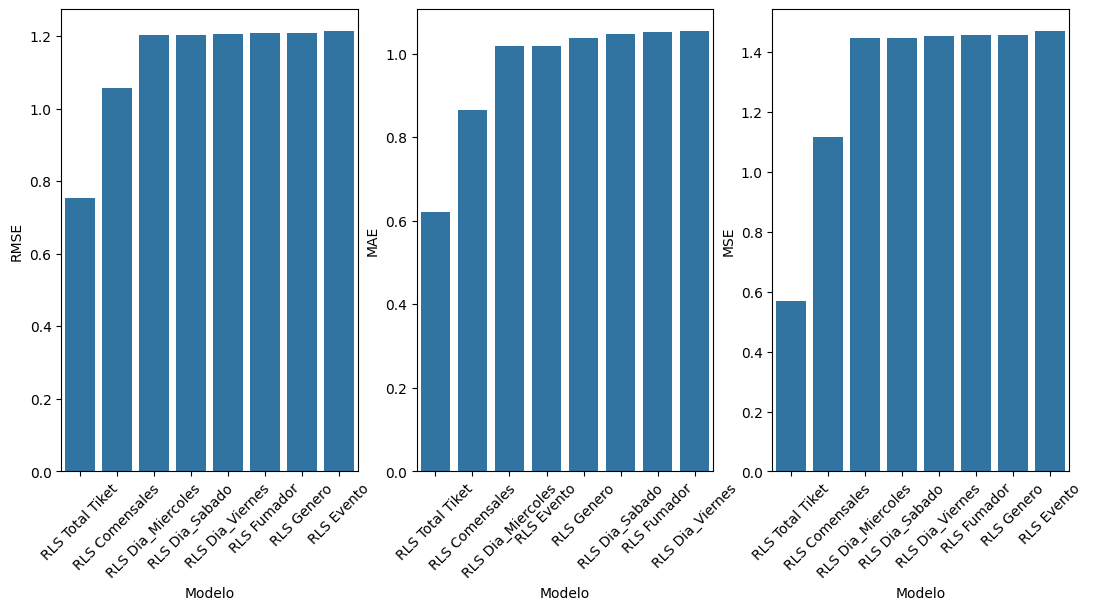

In [ ]:
plt.figure(figsize=(13, 6))
plt.subplot(1, 3, 1)
sns.barplot(df_resultados.sort_values('RMSE'), x='Modelo', y='RMSE') #interesa valor mas alto
plt.xticks(rotation=45)
plt.subplot(1, 3, 2)
sns.barplot(df_resultados.sort_values('MAE'), x='Modelo', y='MAE') #interesa valor mas bajo
plt.xticks(rotation=45)
plt.subplot(1, 3, 3)
sns.barplot(df_resultados.sort_values('RMSE'), x='Modelo', y='MSE')
plt.xticks(rotation=45);

- Representacion de grado de correlacion entre features y propina.

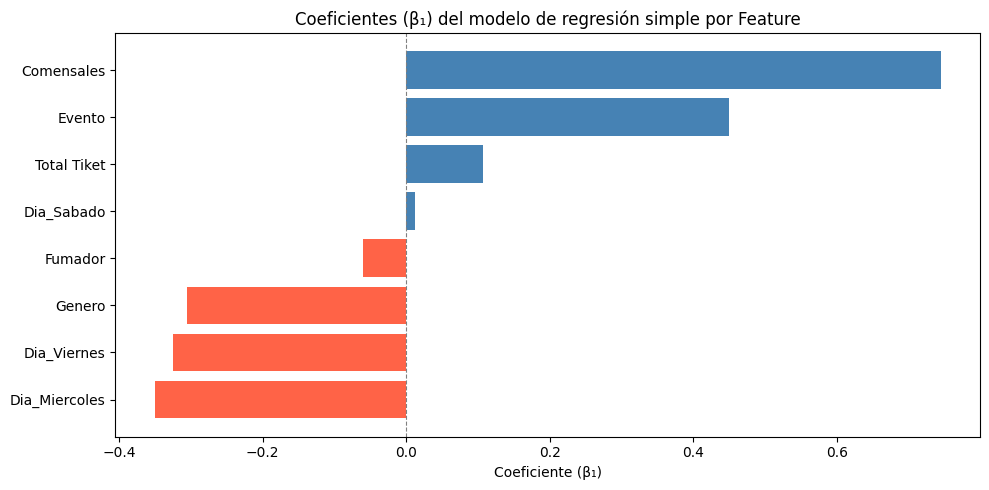

In [ ]:
# Crear DataFrame con coeficientes
df_resultados = pd.DataFrame(df_resultados)
coef_df = df_resultados[['Predictor','Coeficiente (β₁)']].sort_values('Coeficiente (β₁)')


# Gráfico de barras horizontales
plt.figure(figsize=(10, 5))
colores = ['tomato' if c < 0 else 'steelblue' for c in coef_df['Coeficiente (β₁)']]
plt.barh(coef_df['Predictor'], coef_df['Coeficiente (β₁)'], color=colores)
plt.xlabel('Coeficiente (β₁)')
plt.title('Coeficientes (β₁) del modelo de regresión simple por Feature')
plt.axvline(x=0, color='gray', linestyle='--', linewidth=0.8)
plt.tight_layout()
plt.show()

CONCLUSIONES: 
Segun los resultados obtenido por analisis de cada feature en un modelo de regresion simple la mejor metrica es la RMSE de la feature Total Tiket. Es sin duda el mejor resultado aun no siendo satisfactorio.
Es posible que el resultado sea debido a que sea una varaible continua, de la misma forma que la propina.
El r2 0.54 explica el 54% de variablilidad, auque no siendo un valor elevado.
El resto de features aporta muy poco por separado, probablemente debido a que son variables categoricas binarias, cuya relacion lineal no es tan fuerte.

El grafico de correlacion nos mustra que el coeficiente de Total tiket es el mejor. Descartamos la variable Dia_Sabado por estar muy cerca de zero y es dudosa que sea tan fuerte.

El siguiente paso seria probar una regresion multiple para ver si el resultado mejora.

#### Regresion multiple

- Opcion 3: Procedemos a eliminar la variable Dia_Miercoles para reducir la caraga del modelo, evitando ruido innecesario o que esta cause sobreajuste de datos.

In [ ]:
df_resultados_multi = []

predictores = ['Total Tiket', 'Comensales', 'Genero', 'Fumador','Evento', 'Dia_Sabado', 'Dia_Viernes']

X = df_modelo_scikit[predictores]
y = df_modelo_scikit['Propina']

X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train_multi, y_train_multi)

y_pred_multi_train = model.predict(X_train_multi)
y_pred_multi_test = model.predict(X_test_multi)

df_resultados_multi.append({
    'Modelo': 'RLM multivariable',
    'R2': r2_score(y_test_multi, y_pred_multi_test),
    'MAE': mean_absolute_error(y_test_multi, y_pred_multi_test),
    'RMSE': root_mean_squared_error(y_test_multi, y_pred_multi_test),
    'MSE': mean_squared_error(y_test_multi, y_pred_multi_test)
})

accuracy = model.score(X_test_multi, y_test_multi)
print(f"Accuracy en test: {accuracy:.4f}")
print(f"r2 en TRAIN : {r2_score(y_train_multi, y_pred_multi_train):.4f}")
print(f"r2 en TEST: {r2_score(y_test_multi, y_pred_multi_test):.4f}\n")
print(f"RMSE en TRAIN : {np.sqrt(mean_squared_error(y_train_multi, y_pred_multi_train)):.4f}")
print(f"RMSE en TEST : {np.sqrt(mean_squared_error(y_test, y_pred_multi_test)):.4f}\n")


print('Métricas de TEST del modelo multivariable:')
df_resultados_multi = pd.DataFrame(df_resultados_multi) # trasformamos de array a dataframe.

df_resumen_final= pd.concat([df_resultados, df_resultados_multi],ignore_index=True)

df_resumen_final= pd.DataFrame(df_resumen_final).sort_values('RMSE', ascending=True)
print(df_resumen_final)


Accuracy en test: 0.4372
r2 en TRAIN : 0.4581
r2 en TEST: 0.4372

RMSE en TRAIN : 1.0493
RMSE en TEST : 0.8388

Métricas de TEST del modelo multivariable:
              Modelo      Predictor  Coeficiente (β₁)        R2       MAE  \
8  RLM multivariable            NaN               NaN  0.437175  0.667584   
0    RLS Total Tiket    Total Tiket          0.106964 -0.164857  1.053330   
2         RLS Genero         Genero         -0.305733 -0.164857  1.053330   
1     RLS Comensales     Comensales          0.744426 -0.164857  1.053330   
4         RLS Evento         Evento          0.449104 -0.164857  1.053330   
5  RLS Dia_Miercoles  Dia_Miercoles         -0.350035 -0.164857  1.053330   
6     RLS Dia_Sabado     Dia_Sabado          0.012577 -0.164857  1.053330   
3        RLS Fumador        Fumador         -0.059683 -0.164857  1.053330   
7    RLS Dia_Viernes    Dia_Viernes         -0.324303 -0.164857  1.053330   

       RMSE       MSE  
8  0.838758  0.703515  
0  1.206664  1.456037  
2 

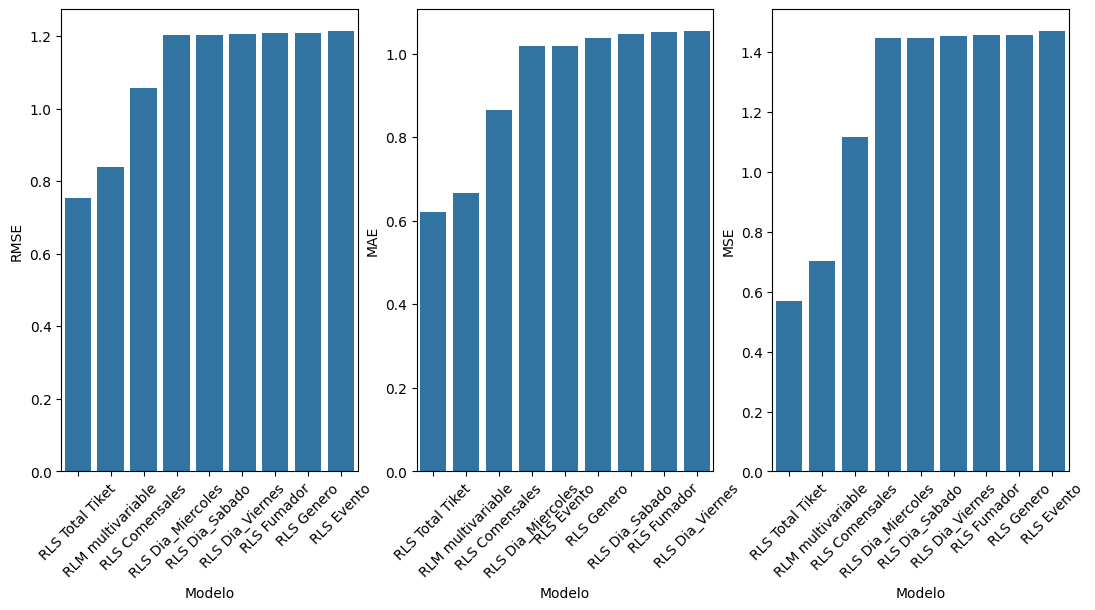

In [ ]:
plt.figure(figsize=(13, 6))
plt.subplot(1, 3, 1)
sns.barplot(df_resumen_final.sort_values('RMSE'), x='Modelo', y='RMSE') #interesa valor mas alto
plt.xticks(rotation=45)
plt.subplot(1, 3, 2)
sns.barplot(df_resumen_final.sort_values('MAE'), x='Modelo', y='MAE') #interesa valor mas bajo
plt.xticks(rotation=45)
plt.subplot(1, 3, 3)
sns.barplot(df_resumen_final.sort_values('RMSE'), x='Modelo', y='MSE')
plt.xticks(rotation=45);

- La metrica RMSE es la que mejor informacion nos reporta, porque penaliza errores grandes y utiliza la misma unidades € que propina, posicionando la variable Total Tiket como mejor feature de predicion, a diferencia del MSE que crece al cuadrado y no es tan facil de interpretar en €.
- R2 de Total Tiket es el valor mas alto, indicandonos ene ste caso que valua el 54 % de la variabilidad.
- El resto de variables no tienen importancia por tener valores que no aportan muhca informacion.  
- Combinar mas de una vairable ( mdelo multivariable) mejora el resultado aunque sea peor por haber predecido sobre datos de test no visto anteriormente, siendo esta una situacion mas realista. 


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline



## 8.Evaluar rendimiento
#### Validacion Cruzada
- validacion cruzada con cross_val_score ( metrica R2), utilizando dataframe inicial.

In [ ]:
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Cross-validation en datos de entrenamiento
modelo = LinearRegression()
cv_scores = cross_val_score(modelo, X_train, y_train, cv=5)
print(f"CV Score Medio: {cv_scores.mean():.4f} - Desviacion: (+/- {cv_scores.std()*2:.4f})")

# Entrenar modelo final con todos los datos de entrenamiento
modelo.fit(X_train, y_train)

# Evaluación final en test (solo una vez, al final)
score_final = modelo.score(X_test, y_test)
print(f"Score en test final: {score_final:.4f}")

CV Score Medio: 0.3120 - Desviacion: (+/- 0.5625)
Score en test final: 0.4372


- El valor de score  y una desviacion tan alta nos indica un modelo muy inestable ( alta variabilidad)
- En el test es algo mejor pero no es muy evidente.

#### Variables derivadas

- Apoyandonos en el analisis descriptivo incial, tenemos otra variable ( Comensales) que puede sernos util para mejorar las prediciones.
- Definiremos una nueva varaibel  Total tiket por comensal 

In [80]:
# Ticket por comensal
df_modelo_scikit['Ticket_por_Comensal'] = df_modelo_scikit['Total Tiket'] / df_modelo_scikit['Comensales']

# Propina media histórica por número de comensales (target encoding)
propina_media_comensales = df_modelo_scikit.groupby('Comensales')['Propina'].transform('mean')
df_modelo_scikit['Propina_Media_Comensales'] = propina_media_comensales


print(df_modelo_scikit[['Comensales', 'Propina', 'Ticket_por_Comensal', 'Porcentaje_Propina', 
                          'Propina_Media_Comensales']].head(5))

   Comensales  Propina  Ticket_por_Comensal  Porcentaje_Propina  \
0           2     1.01             8.495000            5.944673   
1           3     1.66             3.446667           16.054159   
2           3     3.50             7.003333           16.658734   
3           2     3.31            11.840000           13.978041   
4           4     3.61             6.147500           14.680765   

   Propina_Media_Comensales  
0                  2.582308  
1                  3.393158  
2                  3.393158  
3                  2.582308  
4                  4.135405  


- Probamos un nuevo modelo con nuevo predictor con variable derivada

In [91]:
predictores_derivados = [
    'Total Tiket', 
    'Ticket_por_Comensal' 
        
]

X_mejorado = df_modelo_scikit[predictores_derivados]
y = df_modelo_scikit['Propina']

X_train_mej, X_test_mej, y_train_mej, y_test_mej = train_test_split(
    X_mejorado, y, test_size=0.2, random_state=42
)

model_mejorado = LinearRegression()
model_mejorado.fit(X_train_mej, y_train_mej)

y_pred_mej_train = model_mejorado.predict(X_train_mej)
y_pred_mej_test = model_mejorado.predict(X_test_mej)

print("Modelo con Featur Derivada:")
print(f"R² en TRAIN: {r2_score(y_train_mej, y_pred_mej_train):.4f}")
print(f"R² en TEST: {r2_score(y_test_mej, y_pred_mej_test):.4f}")
print(f"RMSE en TRAIN: {root_mean_squared_error(y_train_mej, y_pred_mej_train):.4f}")
print(f"RMSE en TEST: {root_mean_squared_error(y_test_mej, y_pred_mej_test):.4f}")
print(f"MAE en TEST: {mean_absolute_error(y_test_mej, y_pred_mej_test):.4f}")

Modelo con Featur Derivada:
R² en TRAIN: 0.4574
R² en TEST: 0.4574
RMSE en TRAIN: 1.0500
RMSE en TEST: 0.8235
MAE en TEST: 0.6898



Importancia de Features (por coeficiente):
               Feature  Coeficiente
0          Total Tiket     0.129932
1  Ticket_por_Comensal    -0.103955


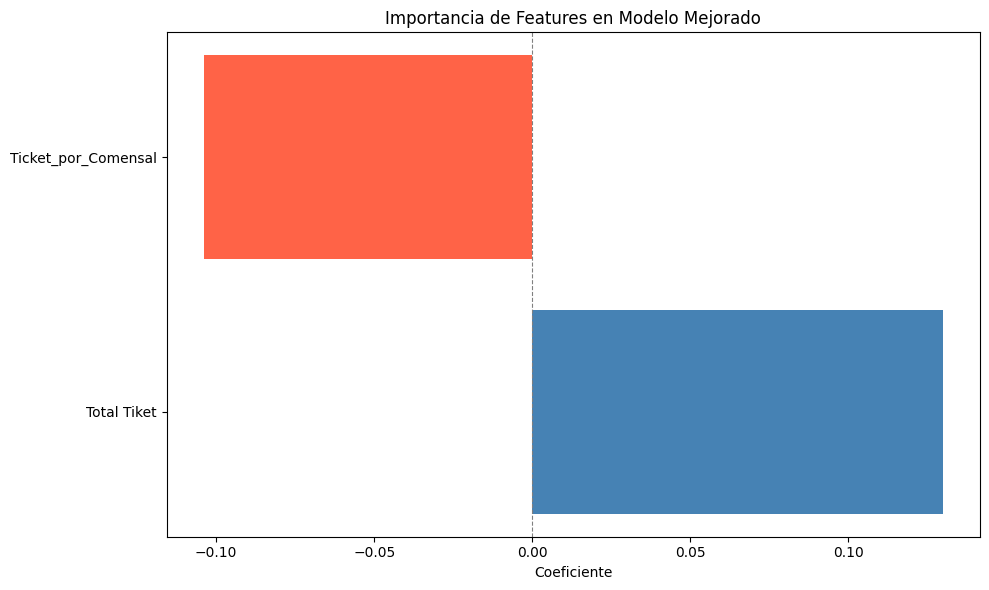

In [88]:
# Coeficientes del modelo mejorado
coeficientes = pd.DataFrame({
    'Feature': predictores_derivados,
    'Coeficiente': model_mejorado.coef_
}).sort_values('Coeficiente', key=abs, ascending=False)

print("\nImportancia de Features (por coeficiente):")
print(coeficientes)

# Visualización
plt.figure(figsize=(10, 6))
colores = ['tomato' if c < 0 else 'steelblue' for c in coeficientes['Coeficiente']]
plt.barh(coeficientes['Feature'], coeficientes['Coeficiente'], color=colores)
plt.xlabel('Coeficiente')
plt.title('Importancia de Features en Modelo Mejorado')
plt.axvline(x=0, color='gray', linestyle='--', linewidth=0.8)
plt.tight_layout()
plt.show()

El total tiket, nos muestra que a mayor gasto mayor propina en un 0.13 €
El tiket por comensal disminuye, interpreto que cuanto mas grande sea el grupo menor será la propina ( -0.11 €). Un grupo de dos personas ( la gran mayoria) dejará probablemente mas propina.

ESTA CORRELACION ES NEGATIVA, POR LO TANTO INFLUYE NEGATIVAMENTE SOBRE EL MODELO CUANDO SE USA SOLO.


In [89]:
# Comparación visual
comparacion = pd.DataFrame({
    'Modelo': ['Original- Total Tiket', 'Modelo con - Feature Derivada'],
    'R² Test': [0.54, r2_score(y_test_mej, y_pred_mej_test)],
    'RMSE Test': [1.02, root_mean_squared_error(y_test_mej, y_pred_mej_test)]
})

print("\n COMPARACIÓN DE MODELOS:")
print(comparacion)



 COMPARACIÓN DE MODELOS:
                          Modelo   R² Test  RMSE Test
0          Original- Total Tiket  0.540000   1.020000
1  Modelo con - Feature Derivada  0.457424   0.823532


## 9.Conclusiones

Los resultados de la validacion final nos ha sugerido que los modelos Total Tiket y RLM no son suficientes para determinar una predicion de la variable y ( Propina).
El filtrado de outlier no aporta ninguna mejora y es preferible utilizar todos los datos disponibles.
El resto de variables aportan muy poco ( coeficientes bajos y errorees similares).
Respecto al modelo de Regresion Multiple hay una pequeña mejora en el RMSE de test respecto al resto de modelom pero sigue siendo limitada por la escasa informacion de las variables categoricas.

Dado que teniamos otra variable latente (comensales) hemos probado a crear una nueva  Featur Derivada pero no nos ha permitido mejorar los resultados.